# 1. Data Cleaning

In [1]:
import pandas as pd

# Load your CSVs
payment_products = pd.read_csv("payment_products.csv")
payment_history = pd.read_csv("payment_history.csv")
subscription_status = pd.read_csv("app_user_subscription_status.csv")
user_subscription = pd.read_csv("app_user_subscription.csv")
app_users = pd.read_csv("app_users.csv")

# Function to drop columns with more than 50% nulls
def drop_high_null_columns(df, threshold=0.5):
    return df.dropna(axis=1, thresh=int((1 - threshold) * len(df)))

# Apply cleaning
payment_products_cleaned = drop_high_null_columns(payment_products)
payment_history_cleaned = drop_high_null_columns(payment_history)
subscription_status_cleaned = drop_high_null_columns(subscription_status)
user_subscription_cleaned = drop_high_null_columns(user_subscription)
app_users_cleaned = drop_high_null_columns(app_users)

# Print remaining columns for each dataset
print("payment_products columns:", payment_products_cleaned.columns.tolist())
print("payment_history columns:", payment_history_cleaned.columns.tolist())
print("subscription_status columns:", subscription_status_cleaned.columns.tolist())
print("user_subscription columns:", user_subscription_cleaned.columns.tolist())
print("app_users columns:", app_users_cleaned.columns.tolist())


/tmp/ipykernel_2126/3850099169.py:5: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  payment_history = pd.read_csv("payment_history.csv")


payment_products columns: ['id', 'gameobjecthash', 'name', 'image', 'method', 'category', 'discount', 'price', 'featured', 'popular', 'published_at', 'expires_at', 'created_at', 'updated_at']
payment_history columns: ['idpayment', 'producthash', 'type', 'status', 'category', 'method', 'amount', 'rewards', 'iduser', 'hide_acquire', 'buying_option', 'description', 'confirmed', 'redeemed', 'created_at', 'updated_at']
subscription_status columns: ['id', 'date', 'trial_total', 'unconverted_total', 'subscriber_total', 'subscriber_member', 'subscriber_pro', 'subscriber_lifetime', 'expired_total', 'converted_to_member', 'converted_to_pro', 'converted_to_lifetime', 'lost_conversion', 'resurrected', 'lost', 'expired_from_member', 'expired_from_pro', 'updated_at', 'created_at']
user_subscription columns: ['id', 'iduser', 'tier_name', 'interval_name', 'product_price', 'status', 'product_id', 'provider', 'started_at_utc', 'expires_at_utc', 'next_reward_at_utc', 'next_reminder_at_utc', 'created_at',

In [2]:
# Delete the first row of app_user_subscription_status (Data transformation point)
subscription_status_cleaned = subscription_status_cleaned.iloc[1:].reset_index(drop=True)

# Show first few rows to confirm
print(subscription_status_cleaned.head())

   id                 date  trial_total  unconverted_total  subscriber_total  \
0   2  2024-08-15 18:00:41          544              66063              3820   
1   3  2024-08-16 18:00:49          548              66063              3821   
2   4  2024-08-17 18:00:57          556              66061              3825   
3   5  2024-08-18 18:00:54          570              66057              3830   
4   6  2024-08-19 18:00:34          577              66052              3836   

   subscriber_member  subscriber_pro  subscriber_lifetime  expired_total  \
0                 57            3734                   29            545   
1                 58            3733                   30            545   
2                 67            3728                   30            544   
3                 72            3728                   30            544   
4                 78            3728                   30            543   

   converted_to_member  converted_to_pro  converted_to_lifetim

# 2. EDA (Exploratory Data Analysis)

## 2.1 App_Users

In [3]:
# Convert object columns to datetime if possible
for col in app_users_cleaned.select_dtypes(include='object'):
    try:
        app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
    except Exception:
        pass  # Keep non-date object columns unchanged
        
# Perform EDA
print("\n--- EDA: app_users_cleaned ---")
print("Shape:", app_users_cleaned.shape)

# Show columns with missing values
missing = app_users_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Show data types
print("\nData Types:\n", app_users_cleaned.dtypes)

# Show summary statistics
print("\nSummary Statistics:\n", app_users_cleaned.describe(include='all'))


--- EDA: app_users_cleaned ---
Shape: (78890, 5)

Missing Values:
 Series([], dtype: int64)

Data Types:
 id                              int64
idhero                          int64
username                       object
created_at             datetime64[ns]
subscription_status            object
dtype: object

Summary Statistics:
                   id        idhero   username                     created_at  \
count   78890.000000  78890.000000      78890                          78890   
unique           NaN           NaN      78504                            NaN   
top              NaN           NaN  llllllll-                            NaN   
freq             NaN           NaN          5                            NaN   
mean    41414.796083  42316.760591        NaN  2021-07-10 10:47:52.483851008   
min         1.000000      1.000000        NaN            2016-05-16 09:13:53   
25%     20493.500000  21760.500000        NaN            2018-12-10 12:54:52   
50%     41146.500000  42417

/tmp/ipykernel_2126/1413992301.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
/tmp/ipykernel_2126/1413992301.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])
/tmp/ipykernel_2126/1413992301.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  app_users_cleaned[col] = pd.to_datetime(app_users_cleaned[col])


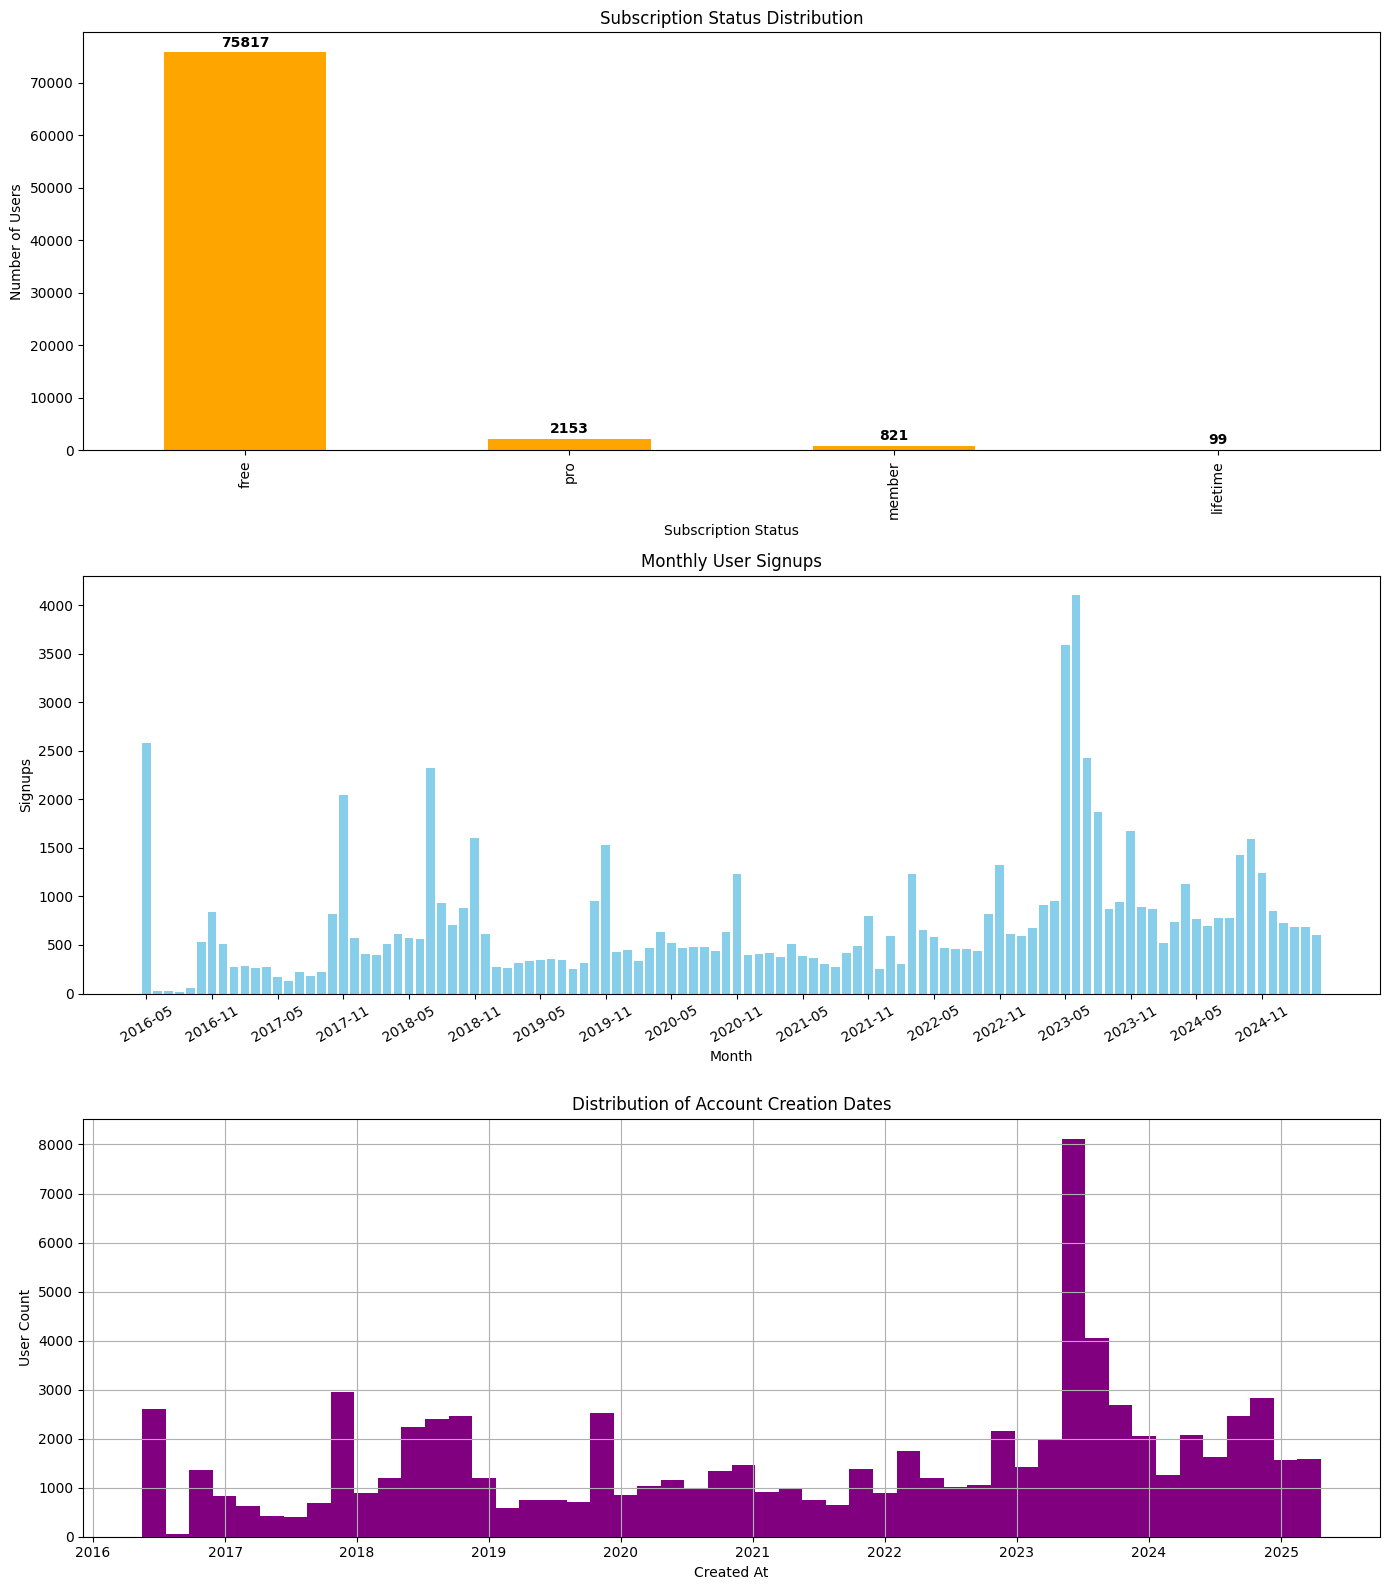

In [4]:
import matplotlib.pyplot as plt


# Create a 'created_month' column for monthly aggregation
app_users_cleaned["created_month"] = app_users_cleaned["created_at"].dt.to_period("M").astype(str)
monthly_counts = app_users_cleaned["created_month"].value_counts().sort_index()

# Setup figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 16))

# 1. Subscription Status Distribution
counts = app_users_cleaned["subscription_status"].value_counts()
counts.plot(kind='bar', color='orange', ax=axs[0])
axs[0].set_title("Subscription Status Distribution")
axs[0].set_xlabel("Subscription Status")
axs[0].set_ylabel("Number of Users")
axs[0].grid(False)

# Add labels on top of bars
for i, value in enumerate(counts):
    axs[0].text(i, value + 500, str(value), ha='center', va='bottom', fontweight='bold')

# 2. Monthly User Signups with better ticks
axs[1].bar(monthly_counts.index, monthly_counts.values, color='skyblue')
axs[1].set_title("Monthly User Signups")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Signups")

# Custom x-ticks for readability (every 6th month)
xticks = list(range(0, len(monthly_counts), 6))
axs[1].set_xticks([monthly_counts.index[i] for i in xticks])
axs[1].set_xticklabels([monthly_counts.index[i] for i in xticks], rotation=30)

# 3. Distribution of Account Creation Dates
app_users_cleaned["created_at"].hist(bins=50, color='purple', ax=axs[2])
axs[2].set_title("Distribution of Account Creation Dates")
axs[2].set_xlabel("Created At")
axs[2].set_ylabel("User Count")

plt.tight_layout()
plt.show()


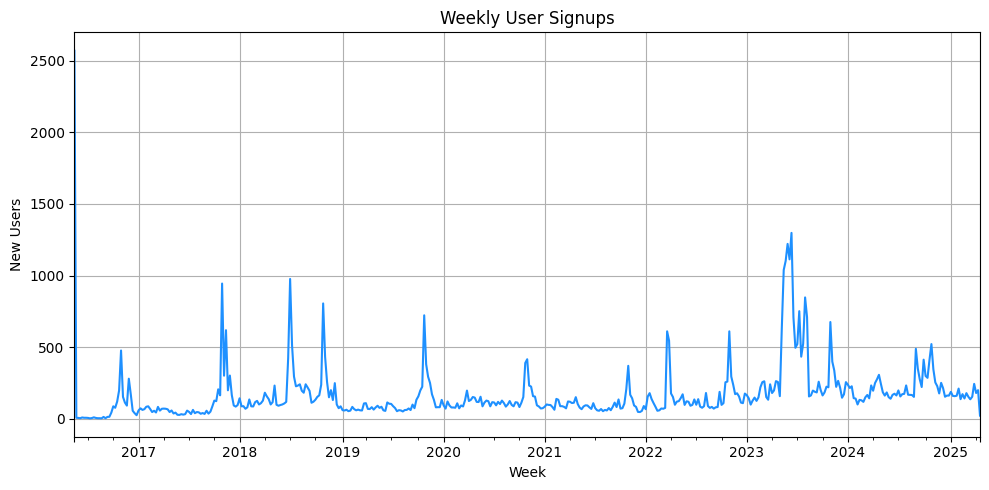

In [5]:
# Ensure 'created_at' is datetime
app_users_cleaned["created_at"] = pd.to_datetime(app_users_cleaned["created_at"], errors='coerce')

# Create a weekly column
app_users_cleaned["signup_week"] = app_users_cleaned["created_at"].dt.to_period("W").dt.start_time

# Count signups per week
weekly_signups = app_users_cleaned.groupby("signup_week").size()

# Plot
plt.figure(figsize=(10, 5))
weekly_signups.plot(kind='line', color='dodgerblue')
plt.title("Weekly User Signups")
plt.xlabel("Week")
plt.ylabel("New Users")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2.2 App_User_Subscription

In [6]:
# Convert object columns to datetime (e.g., created_at, started_at_utc)
for col in user_subscription_cleaned.select_dtypes(include='object'):
    try:
        user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
    except Exception:
        pass  # Leave non-date columns unchanged

# Basic EDA
print("\n--- EDA: user_subscription_cleaned ---")
print("Shape:", user_subscription_cleaned.shape)

# Missing values
missing = user_subscription_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# Data types
print("\nData Types:\n", user_subscription_cleaned.dtypes)

# Summary statistics
print("\nSummary Statistics:\n", user_subscription_cleaned.describe(include='all'))


--- EDA: user_subscription_cleaned ---
Shape: (6818, 14)

Missing Values:
 expires_at_utc           21
next_reward_at_utc      580
next_reminder_at_utc    644
updated_at              735
dtype: int64

Data Types:
 id                               int64
iduser                           int64
tier_name                       object
interval_name                   object
product_price                  float64
status                          object
product_id                       int64
provider                        object
started_at_utc          datetime64[ns]
expires_at_utc                  object
next_reward_at_utc      datetime64[ns]
next_reminder_at_utc            object
created_at              datetime64[ns]
updated_at              datetime64[ns]
dtype: object

Summary Statistics:
                  id        iduser tier_name interval_name  product_price  \
count   6818.000000   6818.000000      6818          6818    6818.000000   
unique          NaN           NaN         3        

/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  user_subscription_cleaned[col] = pd.to_datetime(user_subscription_cleaned[col])
/tmp/ipykernel_2126/325926678.py:4: UserWarning: Could not infer format, so each element will 

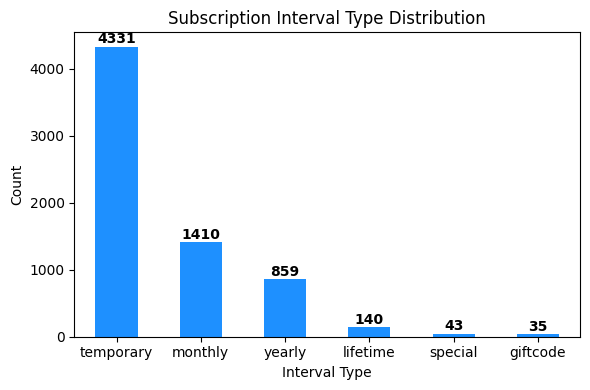

In [7]:
# Get value counts
interval_counts = user_subscription_cleaned["interval_name"].value_counts()

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = interval_counts.plot(kind="bar", color="dodgerblue")
plt.title("Subscription Interval Type Distribution")
plt.xlabel("Interval Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()

# Add data labels on top of each bar
for i, value in enumerate(interval_counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom', fontweight='bold')

plt.show()

## 2.3 App_User_Subsccription_Status

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- EDA ---
print("\n--- EDA: subscription_status ---")
print("Shape:", subscription_status_cleaned.shape)
print("\nMissing Values:\n", subscription_status_cleaned.isnull().sum()[subscription_status_cleaned.isnull().sum() > 0])
print("\nData Types:\n", subscription_status_cleaned.dtypes)
print("\nSummary Statistics:\n", subscription_status_cleaned.describe(include='all'))


--- EDA: subscription_status ---
Shape: (224, 19)

Missing Values:
 Series([], dtype: int64)

Data Types:
 id                        int64
date                     object
trial_total               int64
unconverted_total         int64
subscriber_total          int64
subscriber_member         int64
subscriber_pro            int64
subscriber_lifetime       int64
expired_total             int64
converted_to_member       int64
converted_to_pro          int64
converted_to_lifetime     int64
lost_conversion           int64
resurrected               int64
lost                      int64
expired_from_member       int64
expired_from_pro          int64
updated_at               object
created_at               object
dtype: object

Summary Statistics:
                 id                 date  trial_total  unconverted_total  \
count   224.000000                  224   224.000000         224.000000   
unique         NaN                  224          NaN                NaN   
top            NaN  202

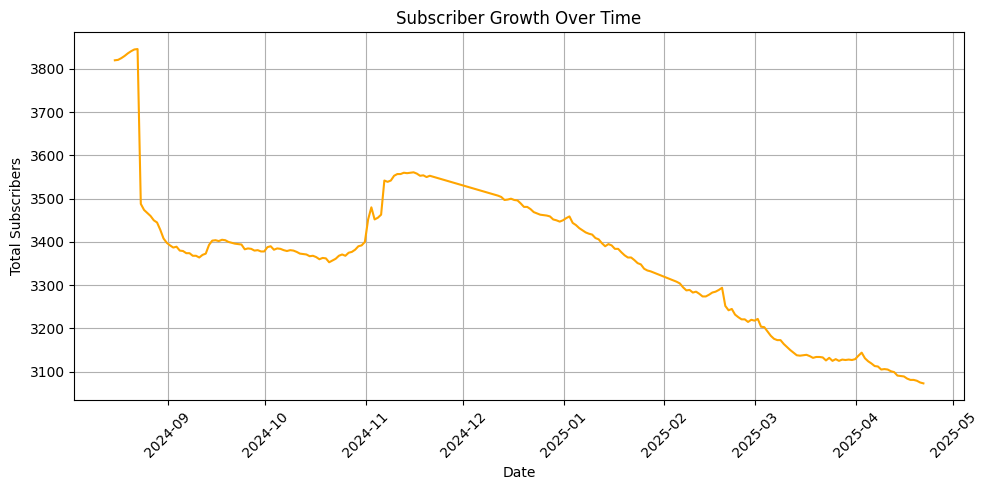

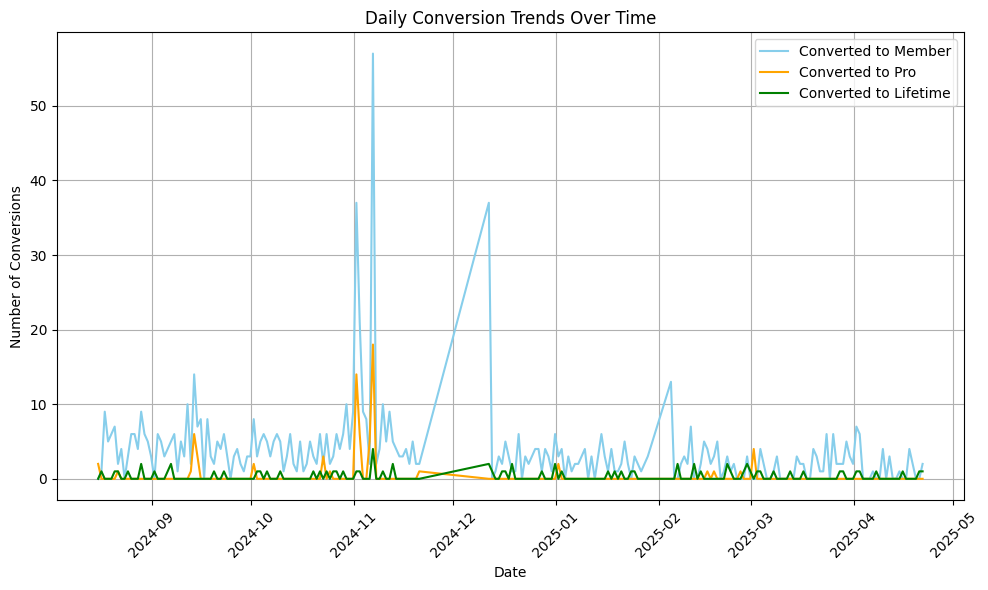

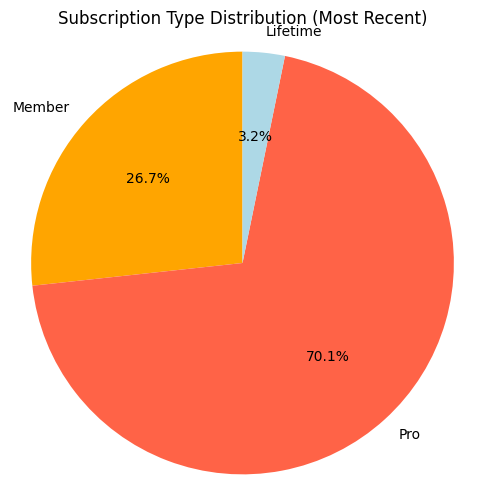

In [9]:
import matplotlib.dates as mdates

# Parse and clean date
subscription_status_cleaned["date"] = pd.to_datetime(subscription_status_cleaned["date"], errors='coerce')
subscription_status_cleaned = subscription_status_cleaned.dropna(subset=["date"])

# 1. Subscriber Growth Over Time
# Plot
plt.figure(figsize=(10, 5))
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["subscriber_total"], color='orange')
plt.title("Subscriber Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Total Subscribers")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Plot conversion trends over time
plt.figure(figsize=(10, 6))
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_member"], label="Converted to Member", color="skyblue")
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_pro"], label="Converted to Pro", color="orange")
plt.plot(subscription_status_cleaned["date"], subscription_status_cleaned["converted_to_lifetime"], label="Converted to Lifetime", color="green")
plt.title("Daily Conversion Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Conversions")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Subscription Type Distribution (latest date)
latest_row = subscription_status_cleaned.sort_values("date").iloc[-1]
labels = ["Member", "Pro", "Lifetime"]
sizes = [
    latest_row["subscriber_member"],
    latest_row["subscriber_pro"],
    latest_row["subscriber_lifetime"]
]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'tomato', 'lightblue'])
plt.title("Subscription Type Distribution (Most Recent)")
plt.axis("equal")
plt.show()

## 2.4 Payment_Products

In [10]:
import pandas as pd

# Load dataset
payment_products = pd.read_csv("payment_products.csv")

# Convert object columns to datetime (optional for better EDA)
for col in payment_products.select_dtypes(include='object'):
    try:
        payment_products[col] = pd.to_datetime(payment_products[col])
    except Exception:
        pass  # Skip columns that can't be converted

# Perform EDA
print("\n--- EDA: payment_products ---")
print("Shape:", payment_products.shape)
print("\nMissing Values:\n", payment_products.isnull().sum()[payment_products.isnull().sum() > 0])
print("\nData Types:\n", payment_products.dtypes)
print("\nSummary Statistics:\n", payment_products.describe(include='all'))


--- EDA: payment_products ---
Shape: (219, 15)

Missing Values:
 coupon    138
dtype: int64

Data Types:
 id                         int64
gameobjecthash            object
name                      object
image                     object
method                    object
category                   int64
discount                   int64
price                    float64
featured                   int64
popular                    int64
coupon                    object
published_at      datetime64[ns]
expires_at        datetime64[ns]
created_at        datetime64[ns]
updated_at        datetime64[ns]
dtype: object

Summary Statistics:
                 id gameobjecthash                        name  \
count   219.000000            219                         219   
unique         NaN            219                         158   
top            NaN          pro_5  Bundle of 44 Core Crystals   
freq           NaN              1                           7   
mean    145.196347            NaN    

/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_products[col] = pd.to_datetime(payment_products[col])
/tmp/ipykernel_2126/1097236828.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`

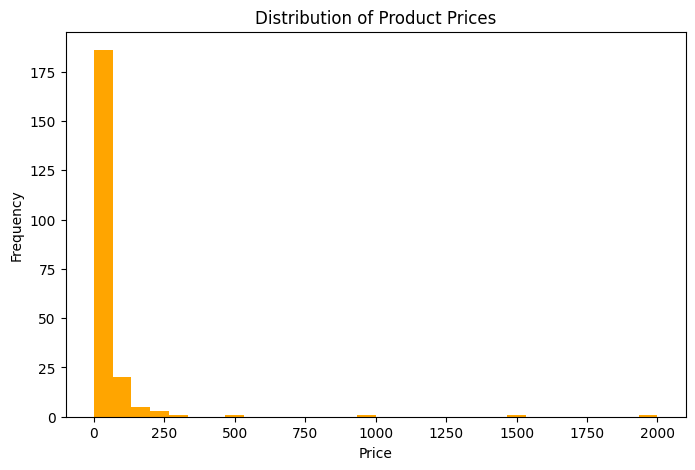

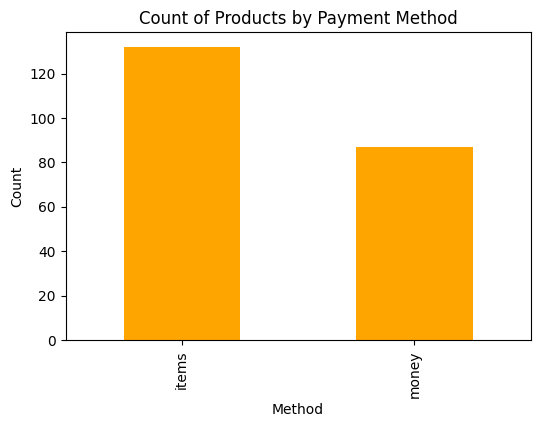

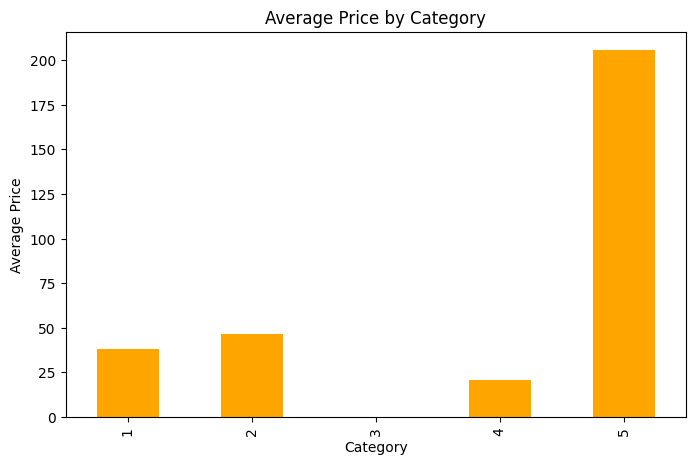

In [11]:
import matplotlib.pyplot as plt

# 1. Distribution of Product Prices
plt.figure(figsize=(8, 5))
payment_products["price"].hist(bins=30, color='orange')
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

# 2. Count of Products by Payment Method
plt.figure(figsize=(6, 4))
payment_products["method"].value_counts().plot(kind='bar', color='orange')
plt.title("Count of Products by Payment Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.grid(False)
plt.show()

# 3. Average Price by Category
plt.figure(figsize=(8, 5))
payment_products.groupby("category")["price"].mean().plot(kind='bar', color='orange')
plt.title("Average Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price")
plt.grid(False)
plt.show()

### 

1. Distribution of Product Prices:

Most products are priced very low.

A few products are priced above 500 and up to 2000, creating a right-skewed distribution.

2. Count of Products by Payment Method:

items method is used more frequently than money.

3. Average Price by Category:

Category 5 has the highest average product price.

Categories 1 and 4 have notably lower average prices.

## 2.5 Payment_History

In [12]:
# Convert object columns to datetime where possible
for col in payment_history_cleaned.select_dtypes(include='object'):
    try:
        payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
    except Exception:
        pass  # Skip columns that aren't datetime

# --- EDA ---

print("\n--- EDA: payment_history_cleaned ---")

# 1. Shape
print("Shape:", payment_history_cleaned.shape)

# 2. Missing Values
missing = payment_history_cleaned.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])

# 3. Data Types
print("\nData Types:\n", payment_history_cleaned.dtypes)

# 4. Summary Statistics (includes both numeric and object data)
print("\nSummary Statistics:\n", payment_history_cleaned.describe(include='all'))

/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  payment_history_cleaned[col] = pd.to_datetime(payment_history_cleaned[col])
/tmp/ipykernel_2126/1946462517.py:4: UserWarning: Could not infer format, so each element will be parse


--- EDA: payment_history_cleaned ---
Shape: (120057, 16)

Missing Values:
 producthash       4674
category          4382
rewards           5247
iduser             138
buying_option     2472
description      27838
redeemed          2551
updated_at         210
dtype: int64

Data Types:
 idpayment                 int64
producthash              object
type                     object
status                   object
category                float64
method                   object
amount                  float64
rewards                  object
iduser                  float64
hide_acquire              int64
buying_option            object
description              object
confirmed                 int64
redeemed                float64
created_at       datetime64[ns]
updated_at       datetime64[ns]
dtype: object

Summary Statistics:
             idpayment producthash     type     status       category  method  \
count   120057.000000      115383   120057     120057  115675.000000  120057   
uniqu

/tmp/ipykernel_2126/2418012459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_history_cleaned["created_at"] = pd.to_datetime(payment_history_cleaned["created_at"], errors='coerce')
/tmp/ipykernel_2126/2418012459.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payment_history_cleaned["created_month"] = payment_history_cleaned["created_at"].dt.to_period("M").astype(str)


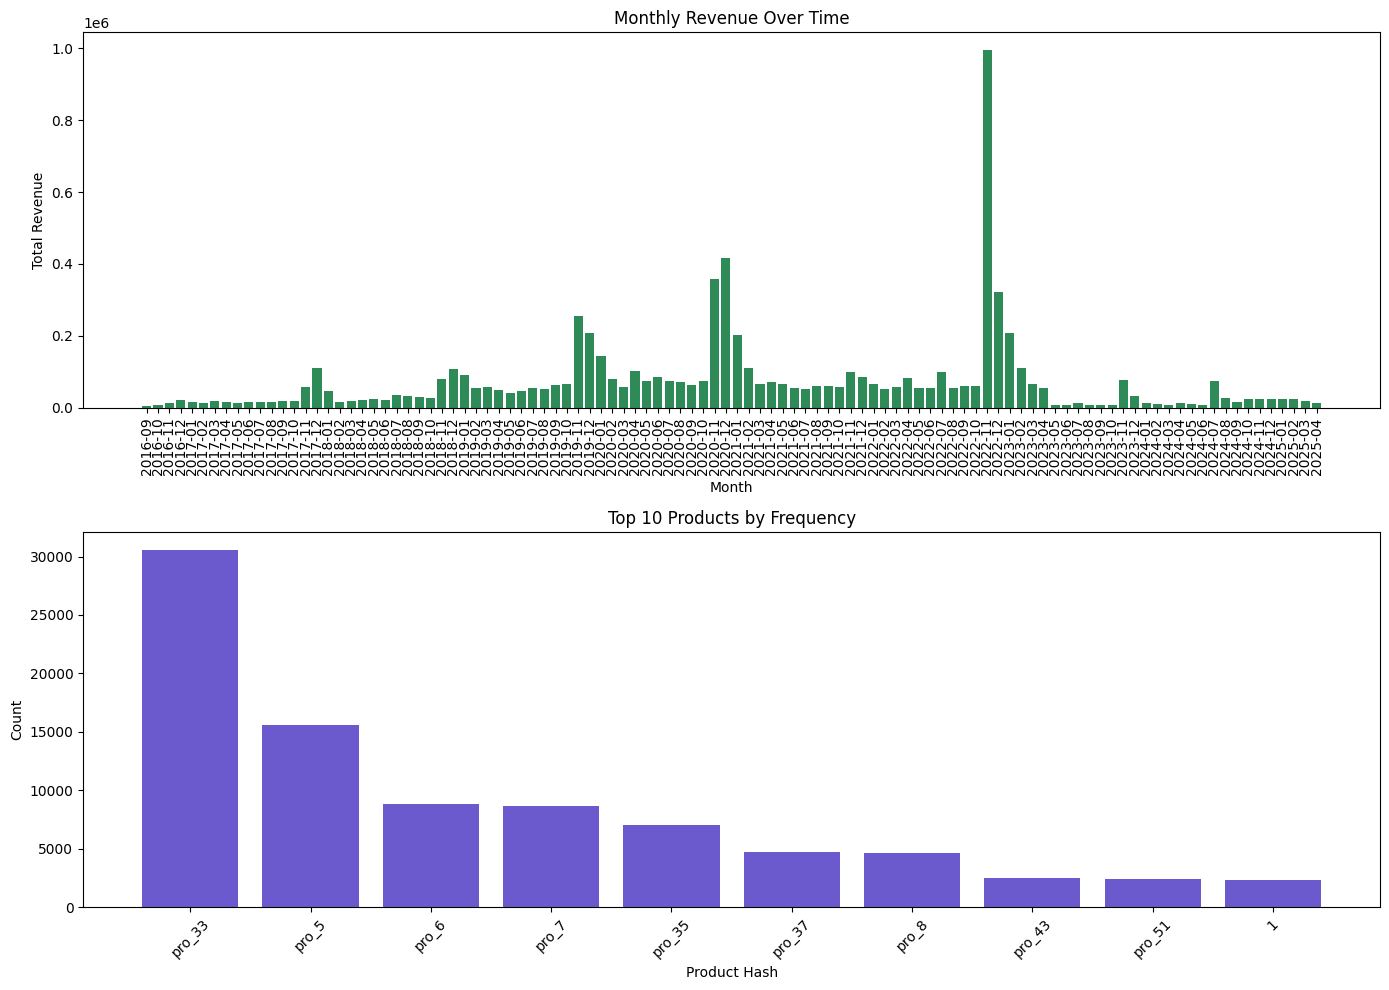

In [13]:
# Ensure datetime parsing
payment_history_cleaned["created_at"] = pd.to_datetime(payment_history_cleaned["created_at"], errors='coerce')

# 1. Monthly Revenue Over Time
payment_history_cleaned["created_month"] = payment_history_cleaned["created_at"].dt.to_period("M").astype(str)
monthly_revenue = payment_history_cleaned.groupby("created_month")["amount"].sum()

# 2. Top 10 Products by Frequency
top_products = payment_history_cleaned["producthash"].value_counts().head(10)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# Plot monthly revenue
axs[0].bar(monthly_revenue.index, monthly_revenue.values, color="seagreen")
axs[0].set_title("Monthly Revenue Over Time")
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Total Revenue")
axs[0].tick_params(axis='x', rotation=90)

# Plot top 10 products
axs[1].bar(top_products.index, top_products.values, color="slateblue")
axs[1].set_title("Top 10 Products by Frequency")
axs[1].set_xlabel("Product Hash")
axs[1].set_ylabel("Count")
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Combining Data into One DataFrame for ML

In [14]:
# Prepare each dataset

# Drop 'id' column from app_users and rename 'idhero' → 'iduser'
app_users_cleaned = app_users_cleaned.drop(columns=["id"])
app_users_cleaned = app_users_cleaned.rename(columns={"idhero": "iduser"})

# Drop 'id' column from subscriptions
user_subscription_cleaned = user_subscription_cleaned.drop(columns=["id"])

# Drop 'idpayment' column from payment history
payment_history_cleaned = payment_history_cleaned.drop(columns=["idpayment"])

# Merge step-by-step on 'iduser'
merged_df = app_users_cleaned.merge(user_subscription_cleaned, on="iduser", how="left")
merged_df = merged_df.merge(payment_history_cleaned, on="iduser", how="left")

# Show the first few rows
print(merged_df.head())

   iduser username        created_at_x subscription_status created_month_x  \
0       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
1       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
2       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
3       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
4       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   

  signup_week tier_name interval_name  product_price status_x  ...  amount  \
0  2017-12-04       pro     temporary            0.0   active  ...    88.0   
1  2017-12-04       pro     temporary            0.0   active  ...     3.0   
2  2017-12-04       pro     temporary            0.0   active  ...    30.0   
3  2017-12-04       pro     temporary            0.0   active  ...    44.0   
4  2017-12-04       pro     temporary            0.0   active  ...     4.0   

                                             rewards hide_acqu

In [15]:
import pandas as pd

# Load dataset
merged_df = pd.read_csv("merged_user_data.csv", low_memory=False)

# 1. Drop columns with more than 90% missing values
threshold = 0.9
merged_df = merged_df.dropna(thresh=int((1 - threshold) * len(merged_df)), axis=1)

# 2. Drop redundant and uninformative columns
redundant_cols = [
    "created_at_y", "updated_at_x", "updated_at_y",
    "promotional_code", "coupon", "info", "redeem_code",
    "referred_by", "redeemed", "confirmed",
    "from_name", "to_id", "invoce_at"
]
merged_df = merged_df.drop(columns=redundant_cols, errors='ignore')

# 3. Rename ambiguous columns
merged_df = merged_df.rename(columns={
    "created_at_x": "user_created_at",
    "status_x": "subscription_status",
    "status_y": "payment_status"
})

# 4. Ensure date columns are parsed correctly
date_cols = ["user_created_at", "started_at_utc", "expires_at_utc", "created_at"]
for col in date_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')

# 5. Convert key numeric columns to numeric types
merged_df["amount"] = pd.to_numeric(merged_df.get("amount", 0), errors='coerce')
merged_df["product_price"] = pd.to_numeric(merged_df.get("product_price", 0), errors='coerce')

# 6. Drop rows missing essential user ID
merged_df = merged_df.dropna(subset=["iduser"])

# 7. Save cleaned dataset
merged_df.to_csv("cleaned_merged_user_data.csv", index=False)

# Preview
print("Cleaned dataset shape:", merged_df.shape)
print(merged_df.head())


/tmp/ipykernel_2126/536796485.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df[col] = pd.to_datetime(merged_df[col], errors='coerce')


Cleaned dataset shape: (213627, 28)
   iduser username     user_created_at subscription_status created_month_x  \
0       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
1       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
2       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
3       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   
4       1   CasuMa 2017-12-07 22:55:35                 pro         2017-12   

  signup_week tier_name interval_name  product_price subscription_status  ...  \
0  2017-12-04       pro     temporary            0.0              active  ...   
1  2017-12-04       pro     temporary            0.0              active  ...   
2  2017-12-04       pro     temporary            0.0              active  ...   
3  2017-12-04       pro     temporary            0.0              active  ...   
4  2017-12-04       pro     temporary            0.0              active  ...   

   payme

# 3. Diagnostic & Baseline Analysis

# 3.1 Revenue Stream Analysis

In [16]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Parse dates
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')

# Convert amount to numeric
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# 1. Monthly Revenue Trend
df["month"] = df["created_at"].dt.to_period("M")
monthly_revenue = df.groupby("month")["amount"].sum().sort_index()

# 2. Revenue by Subscription Tier
revenue_by_tier = df.groupby("tier_name")["amount"].sum().sort_values(ascending=False)

# 3. Revenue by Payment Method
revenue_by_method = df.groupby("method")["amount"].sum().sort_values(ascending=False)

# 4. Revenue by Subscription Lifecycle Status
revenue_by_status = df.groupby("subscription_status.1")["amount"].sum().sort_values(ascending=False)

# Display each part
print("\nMonthly Revenue:\n", monthly_revenue)
print("\nRevenue by Tier:\n", revenue_by_tier)
print("\nRevenue by Payment Method:\n", revenue_by_method)
print("\nRevenue by Subscription Status:\n", revenue_by_status)



Monthly Revenue:
 month
2016-09     4648.0
2016-10     7315.0
2016-11    13113.0
2016-12    20836.0
2017-01    14702.0
            ...   
2024-12    44175.7
2025-01    39995.0
2025-02    45042.0
2025-03    38873.0
2025-04    23387.0
Freq: M, Name: amount, Length: 104, dtype: float64

Revenue by Tier:
 tier_name
pro         4738346.7
member       779325.6
lifetime     509112.5
Name: amount, dtype: float64

Revenue by Payment Method:
 method
items     6914600.0
paypal    1504345.7
card       220148.6
Name: amount, dtype: float64

Revenue by Subscription Status:
 subscription_status.1
active              3612732.5
expired             1468797.2
approval_pending     556081.8
upgraded             285370.1
invalid               75354.8
canceled              26204.4
holding                1496.0
paused                  748.0
Name: amount, dtype: float64


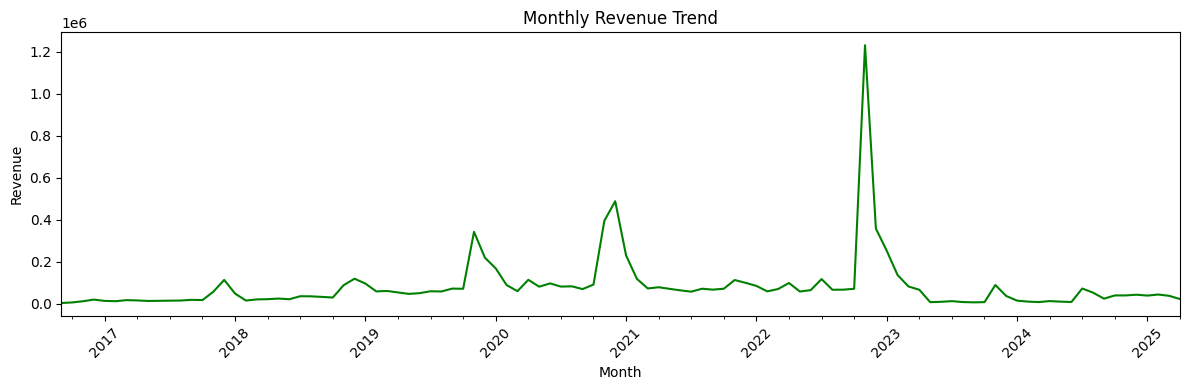

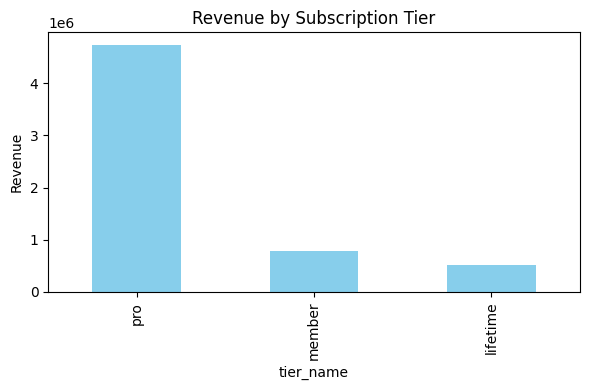

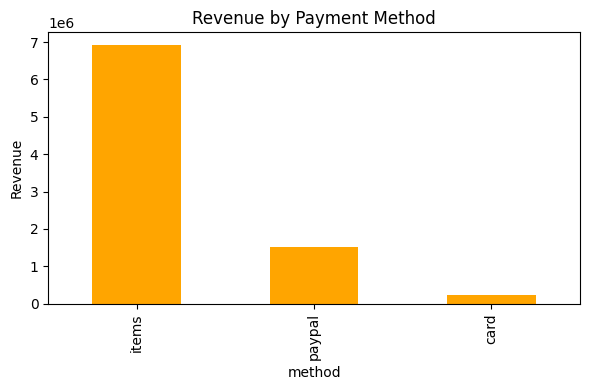

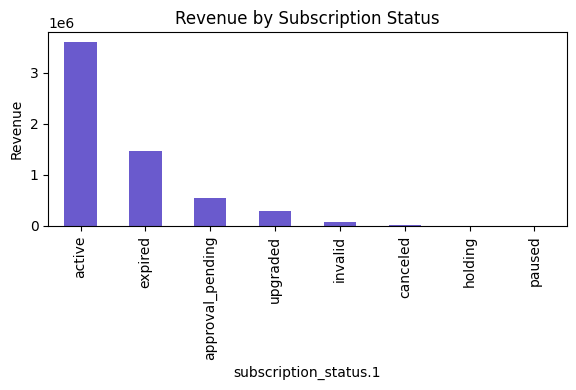

In [17]:
# Convert relevant columns
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# Monthly revenue
df["month"] = df["created_at"].dt.to_period("M")
monthly_revenue = df.groupby("month")["amount"].sum().sort_index()

# Revenue by tier
revenue_by_tier = df.groupby("tier_name")["amount"].sum().sort_values(ascending=False)

# Revenue by payment method
revenue_by_method = df.groupby("method")["amount"].sum().sort_values(ascending=False)

# Revenue by subscription lifecycle status
revenue_by_status = df.groupby("subscription_status.1")["amount"].sum().sort_values(ascending=False)

# === Visualization ===

# 1. Monthly Revenue Trend
plt.figure(figsize=(12, 4))
monthly_revenue.plot(title="Monthly Revenue Trend", color="green")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Revenue by Subscription Tier
plt.figure(figsize=(6, 4))
revenue_by_tier.plot(kind="bar", title="Revenue by Subscription Tier", color="skyblue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 3. Revenue by Payment Method
plt.figure(figsize=(6, 4))
revenue_by_method.plot(kind="bar", title="Revenue by Payment Method", color="orange")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 4. Revenue by Subscription Status
plt.figure(figsize=(6, 4))
revenue_by_status.plot(kind="bar", title="Revenue by Subscription Status", color="slateblue")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

# 3.2 User Segements (To Be Fixed)

In [18]:
import pandas as pd

# Load the cleaned merged dataset
df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Convert datetime columns
df["user_created_at"] = pd.to_datetime(df["user_created_at"], errors='coerce')
df["started_at_utc"] = pd.to_datetime(df["started_at_utc"], errors='coerce')
df["expires_at_utc"] = pd.to_datetime(df["expires_at_utc"], errors='coerce')

# Convert amount to numeric
df["amount"] = pd.to_numeric(df["amount"], errors='coerce')

# Feature engineering
df["account_age_days"] = (pd.Timestamp.today() - df["user_created_at"]).dt.days
df["subscription_duration"] = (df["expires_at_utc"] - df["started_at_utc"]).dt.days
df["is_churned"] = df["subscription_status.1"].isin(["expired", "canceled", "invalid"])

# Aggregate at the user level
user_segments = df.groupby("iduser").agg({
    "amount": "sum",
    "product_price": "mean",
    "subscription_duration": "mean",
    "account_age_days": "mean",
    "subscription_status.1": "last",
    "tier_name": "last"
}).rename(columns={
    "amount": "total_spent",
    "product_price": "avg_price",
    "subscription_duration": "avg_duration",
    "account_age_days": "account_age_days",
    "subscription_status.1": "lifecycle_status",
    "tier_name": "tier"
}).reset_index()

# Define user segments
user_segments["segment"] = "Others"
user_segments.loc[user_segments["total_spent"] > 500, "segment"] = "High-Value"
user_segments.loc[(user_segments["avg_duration"] < 30) & (user_segments["tier"] == "pro"), "segment"] = "Underutilizing"
user_segments.loc[user_segments["lifecycle_status"].isin(["expired", "canceled"]), "segment"] = "Churned"
user_segments.loc[(user_segments["account_age_days"] > 365) & (~user_segments["lifecycle_status"].isin(["expired", "canceled"])), "segment"] = "Loyal"

# Output segmented user data
print(user_segments[["iduser", "total_spent", "tier", "lifecycle_status", "segment"]].head())


   iduser  total_spent      tier lifecycle_status segment
0       1     153893.0    member           active   Loyal
1      28     223752.0  lifetime           active   Loyal
2      92          0.0      None             None   Loyal
3     106        108.0      None             None   Loyal
4     132          0.0      None             None   Loyal


# 3.3 Churn Rate Analysis

In [19]:
import pandas as pd

# Load cleaned dataset
cleaned_df = pd.read_csv("cleaned_merged_user_data.csv", low_memory=False)

# Convert date columns
date_columns = ["user_created_at", "started_at_utc", "expires_at_utc"]
for col in date_columns:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col], errors='coerce')

# Feature engineering
cleaned_df["account_age_days"] = (pd.Timestamp.today() - cleaned_df["user_created_at"]).dt.days
cleaned_df["subscription_duration"] = (cleaned_df["expires_at_utc"] - cleaned_df["started_at_utc"]).dt.days

# Define churn using lifecycle subscription status
churn_statuses = ["expired", "canceled", "invalid"]
cleaned_df["is_churned"] = cleaned_df["subscription_status.1"].isin(churn_statuses)

# 1. Churn Rate by Tier
churn_by_tier = cleaned_df.groupby("tier_name")["is_churned"].mean()
churn_by_tier.name = "Churn Rate by Tier"

# 2. Churn Rate by Price Bucket
cleaned_df["price_bucket"] = pd.qcut(cleaned_df["product_price"].fillna(0), q=5, duplicates="drop")
churn_by_price = cleaned_df.groupby("price_bucket")["is_churned"].mean()
churn_by_price.name = "Churn Rate by Price"

# 3. Churn Rate by Account Age Group
age_bins = [0, 180, 365, 730, 10000]
age_labels = ["<6m", "6-12m", "1-2y", "2+y"]
cleaned_df["account_age_group"] = pd.cut(cleaned_df["account_age_days"], bins=age_bins, labels=age_labels)
churn_by_age = cleaned_df.groupby("account_age_group")["is_churned"].mean()
churn_by_age.name = "Churn Rate by Account Age"

# Combine and display all churn segments
churn_segments = pd.concat([churn_by_tier, churn_by_price, churn_by_age], axis=1, sort=False)
print(churn_segments)


                 Churn Rate by Tier  Churn Rate by Price  \
lifetime                   0.000000                  NaN   
member                     0.204342                  NaN   
pro                        0.403035                  NaN   
(-0.001, 599.0]                 NaN             0.158861   
<6m                             NaN                  NaN   
6-12m                           NaN                  NaN   
1-2y                            NaN                  NaN   
2+y                             NaN                  NaN   

                 Churn Rate by Account Age  
lifetime                               NaN  
member                                 NaN  
pro                                    NaN  
(-0.001, 599.0]                        NaN  
<6m                               0.032473  
6-12m                             0.168627  
1-2y                              0.139597  
2+y                               0.163934  


/tmp/ipykernel_2126/609966676.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_price = cleaned_df.groupby("price_bucket")["is_churned"].mean()
/tmp/ipykernel_2126/609966676.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_age = cleaned_df.groupby("account_age_group")["is_churned"].mean()


# 3.3.1 Churn Prediction (XGBoost)

/opt/conda/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:09:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11673
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     17571
   macro avg       0.99      0.99      0.99     17571
weighted avg       0.99      0.99      0.99     17571

Confusion Matrix:
 [[11618    55]
 [   41  5857]]
ROC AUC Score: 0.9997624382194849


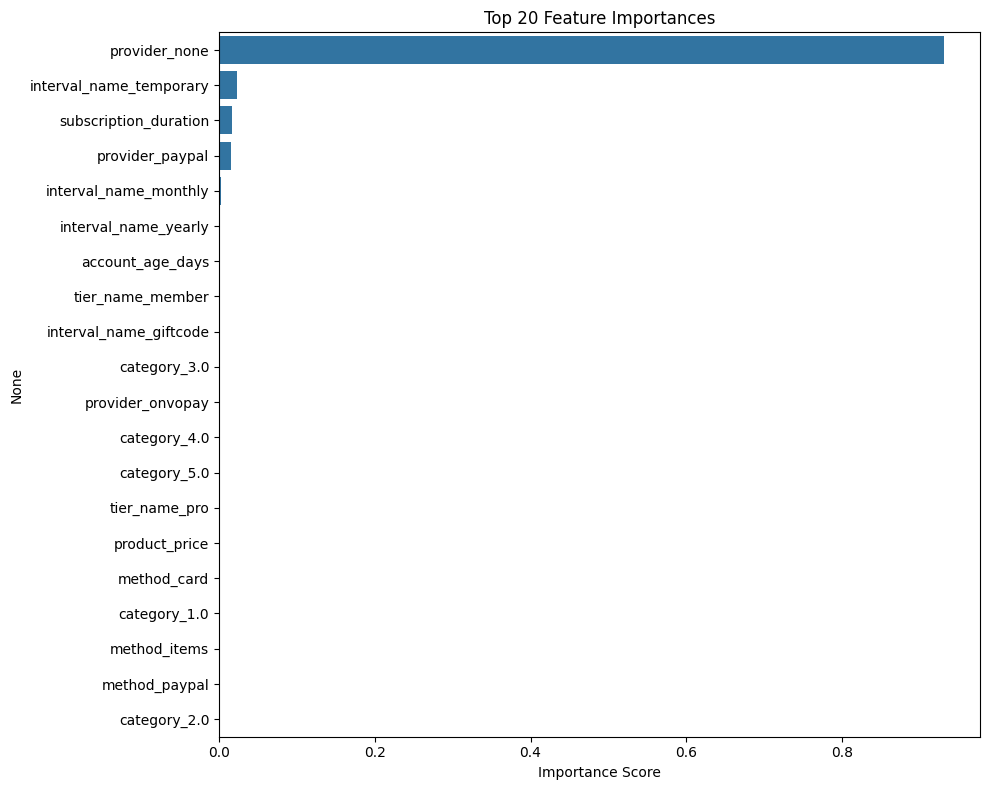

KeyError: '[39036, 78986, 20056, 49507, 76664, 20709, 40722, 34893, 29098, 21107, 76423, 69005, 44453, 75746, 73372, 33842, 85233, 44539, 619, 43437, 44226, 77964, 38103, 82202, 12602, 53894, 5525, 62266, 45517, 54467, 25406, 50318, 46062, 38651, 87440, 27023, 40041, 75812, 24255, 39746, 43833, 48853, 31195, 81593, 54542, 15732, 7290, 78795, 6370, 80424, 54373, 28893, 1013, 67019, 36629, 66965, 66745, 29150, 78714, 60601, 72483, 86733, 79836, 30673, 72567, 38921, 328, 67068, 83463, 25868, 84803, 60450, 63233, 46170, 22344, 24016, 7963, 72336, 59403, 77208, 51386, 22842, 39865, 18558, 53756, 28686, 58253, 22252, 36567, 62778, 44822, 33581, 41625, 76311, 9254, 53480, 36504, 27498, 58428, 53134, 87780, 45939, 32104, 17585, 18819, 74514, 4691, 32023, 76162, 86202, 37709, 33517, 29333, 43183, 87494, 52743, 84427, 20491, 21691, 29843, 10047, 66303, 21428, 71708, 9294, 4215, 45572, 64905, 10986, 65943, 84596, 77693, 4684, 82922, 9011, 47509, 43158, 65419, 45319, 63944, 87512, 614, 83344, 34553, 63606, 62836, 70384, 62951, 72593, 48260, 50204, 50578, 41385, 39720, 75255, 14387, 4249, 83934, 18480, 31212, 4140, 45969, 22778, 12804, 41113, 53993, 81905, 64321, 77197, 38626, 32888, 83183, 35173, 85539, 17682, 17302, 21305, 79316, 33320, 1001, 23930, 83412, 47338, 80224, 44523, 86511, 23767, 1070, 77765, 18863, 26348, 9328, 29169, 66467, 10185, 55776, 51173, 53102, 46992, 24599, 9705, 6161, 85777, 62910, 60584, 81747, 83304, 63428, 77941, 19561, 23936, 69238, 8588, 30769, 83972, 47105, 9176, 62758, 14384, 15859, 12683, 5979, 37873, 51483, 68775, 83372, 34552, 63777, 17237, 26153, 19504, 32940, 28032, 26223, 70648, 79963, 71086, 45105, 20219, 34267, 5118, 51088, 54828, 74699, 32530, 51210, 44429, 5433, 28905, 23612, 55647, 52455, 73220, 37058, 23737, 63691, 29110, 79435, 68960, 889, 46708, 767, 31196, 52447, 19849, 85381, 81739, 19305, 38096, 44984, 18722, 34206, 28282, 64679, 46721, 82767, 41627, 302, 64806, 43039, 917, 7836, 64329, 16274, 81941, 39264, 8982, 68455, 49509, 70614, 11579, 1245, 26764, 76171, 64405, 12930, 73475, 27014, 87173, 47734, 8177, 70524, 11905, 82080, 73260, 24633, 32348, 8530, 14475, 81758, 75581, 65404, 44219, 73947, 45894, 6435, 67384, 41119, 21509, 84688, 16464, 41039, 11396, 86490, 4020, 9400, 4707, 1079, 5326, 34279, 58283, 5381, 73321, 58889, 70754, 78128, 44790, 50244, 6578, 27806, 38268, 68609, 34990, 53771, 45283, 59609, 9110, 23395, 44824, 33556, 19579, 992, 26659, 11127, 82351, 56737, 48788, 27165, 32451, 143, 39289, 13114, 44585, 6837, 43190, 65855, 19847, 80326, 44842, 59411, 82342, 19156, 39604, 40268, 10743, 59440, 7746, 84163, 5650, 65994, 28036, 44093, 85312, 28960, 21156, 65103, 49692, 83915, 86868, 51172, 12451, 30580, 69787, 28475, 46179, 55780, 45739, 62800, 39288, 54930, 34170, 17559, 15097, 15436, 58690, 68799, 10343, 54650, 24792, 67046, 70019, 58893, 15516, 64763, 85870, 49184, 76582, 41068, 80577, 10217, 58329, 74512, 52302, 4665, 79751, 33774, 66626, 1252, 40140, 50292, 77889, 5304, 34290, 32077, 64309, 16305, 37782, 86684, 44255, 64641, 34861, 13470, 6102, 63237, 86575, 76172, 54253, 76732, 50160, 71796, 23119, 13852, 61202, 62558, 8757, 58743, 44375, 68021, 51148, 40053, 80928, 60822, 32022, 10401, 30627, 48299, 85232, 44332, 51689, 69749, 41149, 55156, 65755, 34803, 54503, 41775, 80133, 13096, 67178, 69993, 43859, 70969, 76273, 51620, 31225, 84622, 14364, 7959, 39904, 54455, 36402, 46839, 44610, 55359, 79420, 6223, 13139, 28853, 51147, 46492, 9007, 42830, 8955, 17696, 63410, 53706, 68784, 33616, 20603, 6668, 17063, 23616, 10212, 79309, 20544, 80977, 55468, 45744, 83967, 66372, 84838, 62557, 20022, 54941, 52834, 62759, 69983, 66929, 25453, 38913, 4347, 5558, 25989, 67566, 34780, 16344, 10974, 63188, 53557, 79233, 9827, 66678, 71607, 44571, 18900, 10073, 42427, 21366, 70668, 64377, 36288, 21440, 25024, 1269, 78546, 26547, 19894, 10080, 64176, 37902, 84576, 33048, 59372, 42814, 67447, 52696, 33733, 13170, 42483, 47936, 62166, 36478, 81032, 66415, 44124, 66930, 7847, 27423, 62561, 9075, 53691, 64703, 48190, 37529, 59490, 82198, 32352, 84506, 74772, 68397, 10820, 51316, 8958, 25295, 32627, 87624, 81123, 67702, 21746, 43030, 51644, 46949, 62890, 27395, 46574, 27410, 82907, 26035, 50170, 64286, 31792, 46702, 6565, 17627, 32350, 50711, 85136, 52419, 59391, 17133, 74783, 8099, 34798, 52736, 46744, 12449, 68894, 54355, 55557, 72375, 30644, 15087, 56837, 45576, 47511, 39285, 18980, 11352, 27975, 65972, 83385, 33342, 10103, 41080, 13213, 47200, 7381, 41601, 17014, 23204, 72549, 25281, 87795, 10756, 18681, 85265, 68469, 46605, 46497, 6681, 86117, 60696, 17070, 69713, 43880, 9579, 71835, 82071, 282, 35993, 48612, 6416, 66793, 28465, 78816, 7935, 84272, 26650, 65259, 72199, 87082, 79407, 73777, 39538, 66442, 67888, 26950, 50683, 73698, 11000, 82077, 23117, 22367, 71713, 35487, 41989, 85018, 49700, 27193, 56268, 12423, 15716, 37689, 12364, 72311, 43434, 36755, 10839, 68748, 14301, 15915, 87142, 29439, 13414, 33230, 52580, 85258, 41101, 80370, 4320, 31490, 45763, 30523, 86986, 29177, 70071, 69339, 32867, 4022, 46906, 22803, 19604, 10973, 70653, 33899, 40693, 72046, 73470, 769, 66281, 41098, 54619, 37060, 64687, 18401, 52802, 78424, 79101, 7205, 15532, 50275, 74117, 72485, 8198, 20452, 25594, 67804, 61442, 364, 44363, 18688, 5330, 73886, 74864, 42683, 56269, 83575, 81491, 86274, 19897, 38198, 37358, 39614, 53083, 64649, 49935, 23127, 49023, 72322, 14530, 69036, 19632, 11100, 80878, 67901, 24040, 62197, 80701, 63083, 64580, 66312, 7202, 13818, 47490, 79596, 6457, 54872, 70339, 68791, 65820, 41124, 20212, 17763, 79758, 72591, 72278, 74775, 54279, 63344, 37064, 64425, 72409, 58404, 125, 65965, 83370, 62205, 18814, 77886, 70791, 63869, 22981, 23828, 42151, 45975, 5409, 5182, 5110, 72093, 27094, 14466, 79507, 43497, 5991, 44963, 28760, 54051, 14592, 3984, 72609, 11095, 48402, 58761, 18746, 12790, 60241, 79512, 5359, 78646, 60510, 44192, 42321, 83875, 77031, 22142, 72768, 20024, 41995, 29287, 7108, 15259, 16451, 26548, 55508, 71851, 35053, 29284, 5974, 72923, 59931, 27819, 10469, 18895, 73786, 41871, 54743, 49204, 14299, 66374, 29869, 54351, 19646, 61709, 70735, 83994, 82366, 27702, 85240, 846, 37108, 60308, 55656, 19566, 6593, 44417, 39749, 33853, 85974, 77369, 13002, 60639, 22414, 47996, 21408, 5970, 20502, 14312, 68802, 87630, 70998, 18902, 20398, 5965, 806, 28080, 86514, 34554, 18815, 6118, 240, 49931, 86189, 75733, 33835, 71996, 17708, 15425, 25456, 3994, 1230, 25992, 75815, 17567, 189, 36476, 38114, 86676, 46515, 44223, 61569, 23309, 11084, 52648, 54356, 50259, 7201, 87766, 66240, 43309, 19484, 74782, 80169, 83404, 47479, 17678, 25888, 20513, 61696, 5805, 70341, 73376, 84434, 29358, 47707, 74947, 24816, 10909, 70308, 13486, 66904, 9217, 53130, 1132, 39031, 16142, 41867, 18380, 83718, 49062, 85343, 50608, 39596, 78562, 31218, 40873, 42201, 21846, 65185, 1062, 7881, 37101, 49718, 78574, 6518, 72778, 36361, 77946, 11966, 24268, 12934, 49148, 25606, 85206, 5180, 18684, 67887, 50425, 33319, 190, 65345, 75745, 28716, 54003, 39994, 41071, 19236, 16684, 49165, 17157, 84524, 67719, 70592, 1195, 12962, 75607, 10744, 16442, 67695, 80923, 10325, 59941, 66857, 65858, 14884, 38894, 82850, 37761, 72207, 77958, 14291, 61700, 68477, 16438, 78313, 13967, 54933, 82936, 4466, 61660, 85395, 53085, 60582, 80786, 78159, 83248, 43819, 73456, 83231, 21488, 58280, 75303, 17069, 16521, 82934, 76167, 59445, 15872, 55739, 50301, 8544, 80854, 44258, 68476, 1141, 46871, 24219, 80680, 59163, 16964, 38858, 43751, 74933, 22816, 65104, 44682, 60249, 6746, 12368, 74, 87272, 43083, 35152, 36741, 82852, 18935, 66973, 64085, 59449, 4506, 64790, 60610, 8766, 5361, 72419, 48879, 30676, 75640, 76501, 7742, 67758, 57592, 37052, 63455, 4037, 70309, 28951, 36501, 51257, 20468, 1161, 7960, 86419, 72855, 59267, 26671, 40291, 21312, 27428, 51066, 33008, 33864, 21628, 27959, 17872, 76631, 63181, 48377, 66842, 37619, 32014, 38126, 53120, 28570, 244, 85384, 29041, 10531, 54460, 64592, 87779, 68734, 84363, 5332, 26096, 9441, 83617, 70869, 36363, 35974, 25873, 16174, 1267, 6335, 85108, 44909, 32778, 404, 33400, 9014, 43205, 45249, 48829, 50180, 76587, 32996, 26111, 13520, 76223, 13853, 21117, 75804, 66130, 21714, 85267, 62559, 86786, 75388, 54283, 84036, 78038, 79134, 87601, 37629, 73991, 6695, 60245, 10170, 67978, 78633, 69026, 1102, 87604, 16707, 956, 85263, 78814, 80729, 17773, 42059, 10557, 51001, 76419, 73848, 46175, 79701, 10393, 29327, 32359, 27457, 16179, 62463, 40845, 45627, 81176, 86512, 19870, 10, 52474, 23218, 77328, 80065, 71668, 5172, 61138, 36535, 32565, 490, 48647, 29319, 9330, 34278, 59599, 5953, 62859, 65123, 80682, 80454, 25445, 6588, 83312, 33577, 75625, 13960, 16714, 70358, 48198, 57504, 54339, 27831, 83530, 81020, 17727, 18457, 44037, 70711, 11085, 54752, 85361, 41823, 64705, 53118, 27834, 55266, 31340, 43806, 47783, 85878, 82124, 63729, 23163, 41782, 76226, 43202, 53093, 35496, 23180, 39044, 34269, 86623, 54890, 10541, 78400, 41271, 4144, 68787, 32192, 38586, 78143, 50338, 71599, 235, 41115, 78695, 13862, 66947, 11138, 44832, 64331, 86929, 5075, 76683, 10404, 43939, 87473, 20015, 35478, 82009, 64435, 25091, 66712, 6557, 36524, 28871, 52461, 65392, 46164, 80849, 28567, 85437, 56453, 82076, 87547, 76575, 56646, 52718, 77222, 59588, 13404, 28691, 54044, 3985, 78169, 78869, 39065, 30675, 66769, 38732, 51635, 5689, 62825, 79103, 38856, 28744, 66334, 40231, 26423, 84198, 13236, 30092, 5726, 37329, 78767, 49670, 64755, 37941, 85864, 48754, 23305, 23600, 6496, 42786, 84942, 10365, 63548, 11277, 10381, 84376, 60475, 85447, 48873, 5399, 64835, 18384, 9248, 20391, 9154, 25425, 40878, 13720, 61224, 44158, 19892, 34870, 28394, 49447, 59150, 80477, 79595, 19671, 72043, 38715, 67059, 84883, 87162, 86516, 78612, 12373, 44574, 71990, 1211, 73346, 69567, 45265, 62420, 75087, 390, 73771, 66126, 595, 55861, 13206, 33841, 71984, 54418, 81250, 53198, 22336, 65166, 68459, 43204, 33541, 53835, 46746, 71338, 83161, 32106, 44155, 79845, 15745, 42107, 86739, 22814, 15519, 46420, 14373, 61562, 46422, 13824, 75413, 74573, 34724, 59454, 15101, 71874, 80143, 61473, 35663, 5327, 79934, 62290, 74654, 80314, 83380, 5319, 55038, 7647, 42158, 81182, 82597, 41865, 9233, 14121, 28383, 16224, 27466, 51478, 77213, 39601, 534, 76685, 21997, 4189, 28015, 16971, 53838, 23225, 40298, 83981, 27020, 27198, 887, 82949, 55720, 35164, 48523, 79013, 17105, 38981, 46612, 33904, 35013, 51039, 19179, 8538, 62295, 9829, 38106, 41038, 55769, 86588, 21719, 21232, 63695, 63547, 49532, 80963, 74025, 52448, 788, 66347, 10432, 18465, 1007, 858, 61771, 40891, 18911, 12407, 79769, 46165, 28515, 55588, 45102, 86686, 62125, 19300, 31222, 79327, 9775, 42832, 68768, 27821, 46517, 33552, 64810, 82859, 31207, 24622, 8846, 389, 46064, 49346, 67228, 19233, 51468, 10096, 21405, 45941, 70069, 37773, 63084, 10555, 6800, 54761, 69696, 84038, 27864, 53217, 10360, 85496, 53606, 70581, 27624, 29363, 28395, 60153, 76822, 17151, 64470, 73937, 84379, 11001, 11102, 38611, 25869, 51494, 81835, 9803, 39634, 85314, 68512, 63867, 62543, 17628, 83449, 870, 36028, 45676, 33403, 14404, 10853, 46050, 23006, 41567, 79587, 5231, 627, 85458, 28165, 16153, 69523, 64172, 7520, 46520, 80673, 46969, 35076, 80686, 29432, 22077, 35726, 66795, 30993, 19282, 85138, 481, 52415, 55602, 49055, 18877, 65443, 36396, 9109, 74469, 62094, 82958, 86980, 47178, 48365, 9030, 78170, 16680, 49693, 48065, 15512, 29414, 75637, 22155, 72532, 42273, 9073, 71093, 25289, 19329, 20276, 11197, 67186, 9069, 69226, 45201, 84460, 7189, 59966, 21705, 23023, 43036, 71061, 18927, 86083, 16529, 81202, 44090, 12386, 42187, 84169, 19215, 72499, 58673, 30165, 81781, 45528, 51144, 834, 55967, 85385, 8791, 42941, 6499, 25628, 4070, 45163, 54747, 192, 62389, 79442, 81774, 58321, 33270, 25269, 53221, 14758, 21541, 20508, 64877, 42835, 28137, 67441, 54867, 52472, 53234, 34165, 85744, 67409, 44385, 16226, 37017, 32103, 72993, 615, 18671, 75704, 31806, 33888, 32614, 45335, 29278, 24800, 54017, 32889, 80811, 74586, 85773, 368, 14303, 64768, 43724, 16351, 15192, 45243, 72589, 62737, 9159, 65100, 35135, 67119, 21413, 81398, 7459, 75009, 47076, 84738, 75520, 86776, 5089, 14989, 24035, 52315, 75411, 23357, 28950, 65764, 59365, 78563, 74435, 4269, 62948, 66880, 80104, 83466, 33735, 53869, 70383, 47071, 43728, 54440, 78906, 28240, 60354, 86307, 75656, 75543, 28958, 23017, 876, 17108, 22914, 38490, 16746, 5636, 74668, 12690, 48762, 43887, 6558, 64571, 31370, 17620, 47973, 4264, 14999, 33896, 1014, 53259, 41109, 211, 10335, 44326, 31807, 20636, 6778, 47107, 59162, 50333, 62292, 5356, 79579, 13189, 22047, 4825, 33047, 66714, 5661, 3981, 18844, 73752, 60248, 12394, 32643, 25367, 44916, 1089, 54938, 85021, 6545, 6834, 76959, 70336, 70662, 76440, 50296, 38584, 31297, 14125, 63622, 81981, 18336, 67731, 23159, 25932, 27144, 43761, 25632, 15424, 4772, 16302, 79074, 62577, 61718, 85771, 63948, 34573, 25865, 41859, 17639, 17626, 59367, 79170, 35781, 28785, 10797, 72847, 58473, 50238, 20215, 43248, 25372, 80857, 47393, 85284, 5207, 33213, 65857, 39972, 9779, 33917, 8742, 48269, 17522, 32607, 26531, 75038, 52626, 79801, 4147, 15903, 30348, 6688, 44920, 83722, 27607, 31843, 27186, 29095, 44565, 59455, 84030, 18306, 30093, 23726, 47501, 58846, 31238, 64546, 81576, 58070, 76965, 79634, 16173, 22159, 24048, 55846, 18950, 16143, 40162, 75000, 24596, 4028, 42055, 54452, 11104, 9376, 47498, 53734, 74510, 28978, 79592, 67828, 80734, 68803, 15084, 74566, 81204, 52994, 18827, 42944, 38124, 25431, 5104, 40758, 13065, 7458, 30635, 60259, 42935, 5644, 37759, 42147, 9917, 43993, 51380, 23883, 67181, 18756, 75727, 45816, 25859, 21701, 504, 29398, 55211, 36260, 23820, 41806, 954, 24077, 36020, 8462, 29362, 20453, 33811, 64570, 4833, 62576, 51277, 10055, 85062, 50122, 19644, 27212, 84347, 83620, 34080, 13242, 31140, 66436, 48936, 80507, 5341, 23935, 83422, 63903, 16059, 931, 54324, 55207, 74633, 47151, 85749, 31137, 50620, 14379, 69836, 81008, 32679, 62597, 545, 87597, 11621, 50303, 67761, 37068, 52721, 27983, 38358, 82142, 67720, 28849, 45516, 18968, 16109, 17625, 6061, 39062, 84733, 41585, 56930, 72429, 19188, 73287, 869, 15912, 31000, 45671, 70646, 30997, 60291, 53784, 45933, 83236, 60473, 65252, 27131, 10372, 32295, 64429, 4149, 41036, 69780, 43469, 13815, 5350, 55535, 26346, 33958, 70569, 21001, 25102, 55791, 63425, 87342, 19546, 44368, 78611, 4103, 29282, 5251, 53094, 5410, 83793, 36440, 67621, 32652, 81077, 14368, 34139, 35999, 16219, 46853, 86573, 9289, 48794, 31450, 557, 83173, 69647, 33022, 78476, 76202, 11348, 10453, 81907, 51427, 43729, 87122, 59388, 22993, 652, 49860, 70606, 65360, 22402, 78178, 72558, 55841, 16973, 16036, 11114, 71836, 61681, 44127, 36572, 87327, 74665, 80272, 12432, 30098, 64271, 53295, 19482, 35846, 45286, 84240, 8526, 10040, 13851, 83042, 30679, 71804, 64601, 24241, 66784, 69263, 44934, 14457, 14760, 50117, 40679, 61984, 41170, 36025, 87543, 59893, 7937, 51482, 54687, 15738, 66395, 28245, 86427, 80790, 21340, 63680, 66125, 53192, 44442, 8483, 17764, 28774, 31213, 63535, 11052, 68634, 5023, 5405, 64576, 52803, 66061, 46513, 64065, 52843, 5632, 22194, 80325, 48729, 17604, 46570, 10991, 40093, 7648, 20520, 44248, 27629, 59399, 44145, 86334, 38224, 47237, 12688, 68454, 5364, 13939, 9223, 8749, 65251, 10474, 42360, 70362, 67934, 25622, 62771, 80258, 10299, 86992, 59377, 80130, 25371, 654, 4273, 38215, 60662, 84361, 62394, 23552, 29223, 4032, 76220, 26775, 54047, 67903, 76154, 73347, 38718, 81799, 6157, 54685, 35787, 719, 46773, 35718, 23134, 53975, 42932, 45918, 19630, 8471, 39574, 691, 29193, 6458, 53692, 78888, 27915, 53075, 6305, 9847, 66783, 21721, 81811, 59926, 71818, 78158, 65971, 18930, 4016, 85756, 26217, 87083, 25302, 18860, 3999, 62515, 68995, 28164, 68041, 60604, 26679, 73323, 9234, 64434, 44063, 66349, 34090, 54274, 58173, 68697, 27996, 13970, 51436, 39261, 18978, 72197, 42182, 58460, 19972, 55364, 77237, 5634, 71682, 6347, 52894, 58909, 87385, 10109, 27152, 5658, 17613, 4233, 68801, 76263, 52394, 74466, 39754, 35157, 1136, 4180, 64891, 51679, 16962, 73556, 17147, 27499, 34906, 75739, 54924, 54111, 64057, 15089, 84269, 9562, 39884, 384, 66609, 17310, 25926, 66802, 5051, 85260, 54504, 11994, 6740, 58451, 375, 50282, 67611, 64439, 40179, 52525, 42677, 58772, 49058, 7401, 24062, 63799, 73701, 6018, 71569, 86521, 67609, 5241, 33856, 23972, 17285, 23312, 52379, 54479, 11879, 67020, 54633, 6732, 42106, 699, 68961, 86441, 66652, 21505, 23556, 62765, 53892, 45565, 46429, 39095, 9836, 64692, 41940, 11727, 22413, 10477, 69283, 62939, 87185, 40770, 18329, 15456, 53653, 29381, 21610, 17160, 62924, 25309, 81001, 48096, 6249, 67755, 42338, 21419, 21155, 53733, 54126, 7931, 47957, 32528, 9270, 40715, 34919, 38761, 49250, 72382, 81772, 53370, 50305, 1242, 66953, 84504, 78482, 26632, 854, 82135, 30361, 12428, 85045, 23394, 28144, 60705, 10758, 25026, 44578, 256, 22408, 53863, 68725, 83601, 44680, 28234, 22088, 48656, 72883, 55694, 22799, 65145, 76196, 70395, 43662, 21827, 82334, 19301, 11771, 40047, 6662, 67438, 69242, 67659, 51684, 71052, 8812, 17568, 16557, 19548, 935, 43832, 66324, 24051, 26919, 52731, 68700, 15913, 63167, 51525, 9394, 82326, 45940, 65456, 47547, 5246, 36622, 60670, 5532, 22134, 27812, 35685, 23109, 76730, 41112, 54577, 29562, 32186, 3992, 28031, 25619, 55452, 66185, 13642, 54757, 52203, 79760, 33622, 75972, 76428, 26308, 20214, 65309, 67768, 48618, 33796, 79310, 141, 70717, 73693, 39752, 78467, 77939, 46427, 14872, 41177, 12, 877, 42112, 66220, 13767, 52430, 68448, 25141, 57311, 69497, 58185, 65353, 32448, 83226, 6422, 76728, 61554, 15108, 76366, 40151, 38899, 9010, 13260, 55523, 17635, 19601, 79913, 32385, 86519, 15909, 54300, 48774, 78091, 37646, 23034, 9088, 72316, 16162, 28909, 77564, 69047, 50713, 14874, 5111, 30354, 33669, 5811, 85083, 86906, 6355, 86219, 33979, 76713, 16727, 23832, 21535, 66136, 9211, 19303, 80420, 64437, 8512, 52401, 72969, 44132, 67698, 41790, 13374, 4001, 67051, 30798, 67672, 73850, 72056, 68637, 78850, 42290, 33277, 83148, 5966, 77506, 75694, 85928, 8238, 75697, 6677, 63247, 42808, 87811, 83247, 76254, 18803, 58419, 45336, 7961, 46533, 64846, 22165, 40718, 66153, 27827, 46508, 58739, 26313, 16741, 10004, 86046, 72573, 5376, 20836, 73695, 26112, 13211, 9333, 5869, 80283, 1044, 73259, 53023, 28845, 12369, 52905, 70619, 80982, 6195, 32561, 39276, 19684, 48558, 81949, 74012, 62595, 41602, 20032, 19890, 14455, 67805, 86431, 41273, 72607, 23759, 41081, 28125, 52350, 6858, 63780, 43314, 33854, 58670, 84171, 15829, 17766, 87444, 55566, 55569, 11784, 21847, 18800, 19564, 70789, 73552, 43277, 46782, 26978, 82373, 33023, 86794, 7942, 70873, 44246, 60526, 76329, 75747, 678, 74945, 203, 45254, 35684, 78040, 26428, 24592, 82369, 63363, 63157, 56361, 66319, 32353, 29180, 46083, 73768, 21432, 53170, 1098, 54447, 163, 68903, 70983, 35791, 69333, 42429, 50063, 34716, 76193, 68720, 84669, 13090, 20948, 70610, 35851, 13325, 63790, 28526, 20256, 53711, 20521, 7680, 48551, 30611, 26706, 10338, 39057, 47197, 62070, 822, 25025, 62449, 7266, 38619, 4334, 9783, 59565, 46945, 41855, 42678, 82911, 13225, 13132, 25109, 85089, 55269, 79085, 81594, 16762, 87196, 76571, 15705, 7384, 54075, 55362, 17094, 41134, 47352, 48375, 7744, 52397, 14118, 26164, 80474, 78571, 45934, 495, 78555, 26032, 23735, 78736, 66375, 11885, 50162, 40079, 26538, 76309, 84459, 20416, 47808, 73551, 43225, 8456, 63041, 25272, 64556, 44098, 72946, 84035, 47476, 84538, 48245, 30090, 37887, 18841, 893, 70070, 41121, 28908, 67859, 17047, 64605, 33539, 20267, 43779, 58698, 83519, 21303, 67962, 51622, 13831, 76684, 26905, 22324, 49163, 32544, 84508, 78991, 63754, 35148, 54052, 6276, 64671, 79697, 28683, 27984, 54645, 74024, 67548, 47233, 4167, 28069, 53811, 47976, 66082, 24022, 9383, 4332, 80800, 15514, 65116, 32076, 36351, 541, 69703, 19311, 66623, 84402, 76704, 14900, 10980, 49528, 5415, 21965, 68738, 45976, 75102, 52690, 40681, 21436, 45741, 62346, 42574, 68497, 47231, 49171, 61818, 55831, 60538, 28464, 73757, 73384, 9370, 39558, 54607, 67047, 34294, 73290, 62611, 12692, 78485, 76658, 84360, 64640, 23243, 33229, 66318, 85216, 50957, 17065, 29500, 81264, 16054, 12314, 29822, 38961, 63491, 61719, 67832, 54068, 47143, 25376, 21677, 1200, 32629, 50662, 80978, 43570, 38880, 70961, 33193, 41258, 9245, 80726, 64277, 86237, 42381, 38614, 34928, 63690, 76301, 42259, 70790, 43849, 48276, 65277, 4288, 55517, 40303, 36565, 36268, 7731, 8769, 81655, 16951, 75701, 18427, 85043, 69003, 64469, 40869, 72356, 60155, 47751, 36588, 87131, 86799, 44858, 78379, 73607, 10001, 63928, 65120, 34096, 67917, 43656, 69016, 12448, 27012, 36079, 65400, 80676, 136, 87436, 41030, 44764, 81260, 4150, 5619, 40235, 81297, 9034, 82201, 50665, 28249, 32653, 79650, 70689, 20269, 66873, 38081, 67707, 48298, 77935, 33502, 10754, 65688, 67723, 27949, 79008, 30357, 62203, 32930, 41987, 21278, 73205, 85401, 64894, 47219, 47129, 72292, 16, 78974, 80170, 46357, 16238, 35525, 13077, 45344, 34606, 47080, 75091, 32578, 85017, 44193, 69012, 47719, 52801, 66952, 47587, 30304, 25380, 67477, 74486, 66966, 64817, 20649, 51113, 83129, 81940, 72350, 48271, 55643, 78103, 42957, 11333, 83482, 71354, 22800, 60361, 64954, 72303, 48390, 17446, 26708, 50217, 46407, 54483, 30210, 8175, 18848, 87412, 21300, 72467, 27200, 77702, 5226, 10331, 28965, 76820, 23215, 65151, 38691, 10379, 70623, 44446, 69248, 26539, 22187, 70382, 81396, 9021, 62108, 9267, 53832, 11099, 35708, 67458, 43167, 24631, 75686, 65811, 39283, 53246, 27013, 62806, 14106, 43074, 53306, 12321, 13121, 43076, 23189, 27037, 34793, 71734, 24017, 86981, 37075, 85347, 16473, 45331, 62642, 52832, 54781, 18982, 11063, 48824, 12908, 49648, 4699, 32290, 77203, 36277, 79594, 18381, 73441, 49701, 8987, 7842, 54091, 67065, 67879, 35858, 331, 75742, 27478, 12343, 16485, 21735, 5426, 48544, 6099, 80338, 14112, 83527, 13005, 55450, 18421, 81108, 70618, 34101, 2539, 45086, 12682, 29061, 29107, 72505, 10700, 4201, 58759, 47246, 28682, 73434, 35776, 46395, 60823, 25419, 76315, 62110, 9707, 44685, 42066, 44164, 70553, 45097, 69655, 38089, 10056, 71738, 41824, 60218, 70957, 53165, 37088, 17580, 835, 12453, 60275, 54691, 24829, 28988, 53055, 84429, 73217, 46822, 87758, 40881, 32914, 65467, 66979, 46786, 68963, 61361, 53972, 35987, 7454, 14322, 40095, 21468, 83335, 1088, 43214, 23927, 27237, 36175, 16233, 36590, 74638, 38734, 29861, 85371, 19848, 30623, 39259, 18566, 63440, 21972, 27917, 60617, 33112, 45083, 79715, 81251, 34140, 10307, 43066, 6017, 39901, 39977, 72843, 68535, 77143, 32998, 42578, 53996, 18291, 75544, 20473, 26000, 66282, 84011, 86783, 86269, 25285, 41926, 19494, 37094, 67717, 53024, 33585, 75118, 16049, 51681, 8796, 6854, 35748, 78542, 44556, 17129, 24231, 38418, 16475, 15451, 54081, 1172, 16546, 67192, 1155, 78304, 6848, 66877, 41617, 43774, 72340, 11159, 922, 38645, 159, 72473, 62520, 41059, 59554, 69313, 38356, 16012, 75572, 64693, 33402, 69240, 78828, 65968, 57406, 28979, 4283, 47686, 26335, 22974, 76067, 63788, 78582, 17594, 16698, 14565, 31135, 85735, 78150, 13183, 52346, 47711, 45961, 67469, 17170, 63154, 79288, 36580, 64164, 25013, 65313, 23912, 11168, 57883, 453, 53213, 8768, 54076, 81145, 87493, 83408, 66293, 45534, 249, 72291, 52343, 33236, 52793, 26921, 6019, 29811, 29521, 80950, 26629, 50341, 65741, 67773, 33745, 77486, 8473, 77364, 33398, 64795, 17275, 60748, 40227, 81792, 15116, 23530, 51424, 31845, 15195, 44207, 45625, 26365, 77, 78168, 26442, 58291, 58777, 22355, 18388, 11093, 69998, 8508, 73420, 17391, 55448, 38863, 76943, 48800, 49518, 14573, 78859, 81257, 29032, 65188, 9765, 19226, 72456, 77426, 41054, 58652, 13171, 53866, 87549, 32648, 70176, 87637, 75059, 38623, 72559, 276, 27550, 75405, 64826, 40067, 68767, 13224, 86232, 84192, 79785, 37016, 17127, 70994, 6483, 58165, 42538, 54114, 19999, 78, 65295, 28081, 27486, 58651, 66272, 29047, 67726, 58264, 19206, 41189, 80684, 21404, 86469, 78754, 11012, 28895, 25875, 9878, 18342, 12812, 63706, 11124, 47963, 16358, 23252, 10703, 79321, 50699, 23668, 11078, 54592, 6263, 38668, 43640, 79256, 4686, 80589, 38942, 87555, 37622, 48573, 33485, 9511, 13493, 19470, 29263, 15703, 43920, 72614, 85241, 58897, 51384, 9197, 83128, 4722, 18648, 68807, 34851, 4184, 35808, 44693, 43617, 42365, 9012, 74572, 10215, 32051, 29841, 23358, 25614, 64036, 47650, 17558, 41568, 48578, 40769, 30717, 28685, 35047, 65735, 50604, 42813, 38199, 11896, 60460, 786, 15848, 84254, 19655, 51623, 70571, 23942, 11923, 66665, 71264, 55978, 59608, 82015, 11650, 71746, 60591, 70036, 44772, 19624, 87677, 31911, 46756, 737, 53194, 85075, 19225, 17556, 70303, 82622, 23137, 44761, 19839, 28384, 75530, 30162, 67539, 45639, 60359, 76826, 79097, 33786, 58776, 13931, 5126, 63761, 61181, 197, 84264, 14828, 31206, 73837, 47904, 55757, 35493, 86619, 228, 47888, 29842, 33873, 25275, 14838, 83513, 54499, 84668, 17725, 8718, 11967, 68595, 27419, 126, 44172, 87283, 26322, 70305, 15430, 15582, 74487, 72084, 23339, 50482, 51408, 34914, 48847, 60633, 86989, 32549, 13946, 42326, 54118, 16468, 8740, 64683, 36748, 14890, 22160, 42068, 11938, 78472, 8548, 14585, 25497, 14775, 36392, 12798, 52796, 67489, 80697, 83551, 37668, 46193, 61560, 35937, 26699, 75893, 35118, 21838, 15537, 53135, 73194, 68703, 5430, 23699, 42369, 80981, 8505, 48532, 24229, 32952, 63099, 63925, 70770, 26483, 207, 67567, 80144, 19669, 68022, 37639, 28085, 75523, 8460, 46977, 58171, 45597, 48051, 81093, 83965, 48283, 33159, 67010, 27694, 569, 33732, 69649, 76499, 7690, 14283, 29114, 32830, 54540, 10452, 78755, 44913, 77406, 86550, 28972, 69054, 53434, 29228, 21195, 13113, 64625, 20693, 11081, 43026, 43081, 13167, 54092, 69024, 19762, 18339, 28865, 35689, 21292, 63063, 35618, 12376, 41810, 35985, 33266, 50178, 48797, 81284, 72766, 50942, 57120, 32286, 38194, 10048, 6554, 23369, 80685, 36090, 43704, 24020, 9216, 87085, 49239, 84871, 69778, 43231, 72557, 41992, 6185, 70953, 42154, 29335, 33913, 5951, 36754, 44418, 39055, 5187, 47740, 82603, 5163, 48409, 11706, 52890, 71991, 41025, 69910, 10241, 46770, 80501, 35786, 15535, 45280, 28467, 24240, 6849, 81737, 215, 17875, 25929, 43938, 17675, 27951, 26664, 51008, 47967, 55710, 37899, 30607, 5031, 663, 87354, 47488, 42002, 58356, 85081, 53273, 38918, 755, 16706, 66132, 65149, 33468, 58417, 64083, 60740, 79764, 26440, 10488, 53147, 55777, 13346, 69722, 555, 35143, 34094, 83607, 73273, 72208, 42339, 63525, 83180, 31220, 16072, 66918, 44633, 58452, 42044, 27497, 63240, 22120, 14589, 42168, 71805, 66980, 62182, 47739, 29373, 7392, 32078, 17644, 69716, 50312, 35704, 63462, 77895, 76643, 24848, 35681, 46894, 41822, 68630, 61673, 21381, 72054, 59357, 15494, 20244, 51244, 54611, 14583, 81090, 14292, 23174, 66451, 21415, 18453, 814, 31808, 29012, 73471, 46550, 13477, 71608, 13536, 18670, 24620, 4588, 4640, 23549, 42446, 69659, 36411, 63618, 28043, 6840, 11897, 55844, 53831, 5629, 84885, 9397, 26599, 665, 45870, 60195, 86626, 47262, 6024, 47694, 507, 34158, 74978, 66123, 52406, 26942, 87809, 40730, 27972, 36989, 22313, 65958, 77562, 16720, 80115, 22998, 13634, 51315, 29825, 18791, 53285, 22195, 20463, 27432, 84887, 76817, 5097, 7693, 83358, 85270, 6718, 77351, 85464, 40667, 23038, 60530, 84244, 4299, 86513, 36730, 85937, 75418, 26674, 53301, 11980, 16755, 19310, 5357, 53216, 42344, 7752, 27480, 41788, 51082, 62450, 32623, 69652, 6611, 78895, 29172, 62472, 30269, 18385, 36026, 14366, 145, 66703, 87826, 58440, 12674, 53368, 55327, 61684, 80468, 75734, 80665, 64041, 6225, 2537, 27411, 47365, 43092, 4126, 29033, 45579, 4094, 64094, 53917, 22307, 42920, 65417, 50506, 54977, 51426, 28530, 78581, 69332, 78732, 86689, 70590, 73306, 38262, 60276, 50066, 30094, 55457, 9293, 51477, 11888, 49709, 27467, 68467, 20942, 43200, 57402, 9204, 54765, 6820, 76143, 55087, 5432, 73192, 62272, 5232, 72930, 74481, 64612, 18799, 63035, 41817, 17762, 45801, 20018, 67635, 60749, 50612, 60295, 52380, 26345, 21474, 47112, 68368, 42704, 43085, 20050, 30674, 4034, 75414, 71409, 29246, 22933, 40701, 67063, 43868, 15086, 81252, 85396, 68507, 70731, 44582, 47280, 21444, 78107, 26949, 40774, 62258, 23808, 83746, 645, 10406, 84375, 46535, 53373, 78084, 22590, 82338, 8827, 36972, 33887, 77294, 23366, 68606, 4670, 36406, 49499, 77218, 26169, 38713, 25023, 28690, 73918, 35760, 17784, 9891, 39636, 81807, 54582, 41850, 7307, 28028, 85933, 7271, 50125, 22787, 7649, 64963, 62883, 61577, 41142, 83926, 18452, 35621, 84694, 9043, 40056, 15106, 67764, 46568, 69831, 54433, 53834, 48049, 68445, 14798, 59618, 34282, 26662, 75736, 72283, 17861, 85929, 1129, 78183, 19495, 75740, 51676, 8522, 19801, 50255, 9215, 87439, 28094, 38882, 14317, 51108, 18726, 54609, 84657, 33006, 78253, 73587, 38256, 40054, 16686, 50029, 66850, 83362, 81247, 41779, 7849, 62250, 27988, 51076, 258, 17280, 84680, 32221, 82127, 4586, 69521, 4325, 69814, 85402, 13262, 17862, 17332, 78421, 76588, 32622, 27113, 85350, 64665, 80476, 53086, 21133, 59371, 69281, 18370, 48086, 46752, 19189, 84661, 60636, 54353, 37760, 66143, 31169, 7273, 36358, 78609, 44840, 22909, 6257, 49061, 47791, 29496, 728, 52769, 75524, 33737, 84381, 15236, 16419, 82353, 27321, 46185, 13963, 83602, 44825, 23770, 62135, 53369, 33795, 80465, 85239, 15006, 54925, 79518, 39098, 50189, 55355, 73675, 33845, 5394, 19299, 82640, 6154, 85202, 33497, 29846, 16522, 29411, 9, 85931, 67947, 47905, 16484, 7609, 57789, 29800, 28468, 73784, 31350, 161, 49285, 43045, 40773, 70621, 1134, 72555, 47662, 77062, 12051, 86905, 21609, 44681, 79320, 43568, 48765, 83477, 28887, 25392, 29353, 27452, 44593, 75042, 53710, 86880, 20517, 67674, 78618, 18724, 35788, 45903, 54121, 66135, 46098, 10330, 32859, 17538, 70005, 59165, 74977, 76430, 67688, 75511, 25181, 20260, 25135, 27043, 446, 70955, 174, 42819, 77505, 66094, 29343, 33525, 33056, 32525, 70349, 23403, 67538, 25515, 39969, 5647, 18405, 50594, 52740, 29405, 27112, 54638, 28888, 68626, 76290, 36259, 37765, 67004, 63149, 15434, 50250, 41932, 8541, 71592, 19887, 4208, 67690, 21285, 82844, 18749, 4010, 33147, 23844, 16276, 74954, 40038, 43600, 74698, 34433, 55635, 45556, 32516, 80668, 57784, 45564, 42075, 66838, 65186, 10774, 39578, 85038, 31912, 37049, 25361, 26909, 13929, 42123, 44530, 65385, 75795, 81059, 19327, 55691, 17010, 68484, 28767, 45897, 17178, 50256, 48559, 59270, 18702, 71862, 20250, 29056, 1125, 30793, 11112, 13915, 59923, 63404, 50673, 38673, 6678, 5298, 9908, 63064, 77421, 6826, 72423, 13228, 1167, 53056, 23771, 21130, 75900, 63804, 63437, 69557, 19556, 13352, 46289, 40051, 9074, 25512, 76939, 27095, 77196, 35714, 42260, 20549, 27483, 51208, 74156, 54578, 74948, 68849, 13515, 60509, 49365, 20439, 81791, 66871, 66020, 27110, 83222, 27734, 20231, 61120, 44650, 82858, 27118, 26701, 68522, 206, 66798, 32620, 54481, 42186, 60525, 53873, 44173, 67467, 74155, 30216, 5557, 86398, 62200, 73478, 84004, 66510, 50679, 48031, 33524, 44351, 81095, 21457, 75600, 38196, 63441, 83924, 363, 87192, 64903, 79201, 37030, 25459, 67833, 4593, 46192, 64550, 64467, 44401, 86600, 74673, 42012, 83439, 73298, 54376, 13095, 79656, 48173, 40666, 13932, 23743, 39750, 717, 50225, 48327, 4043, 37063, 17130, 69308, 81156, 38261, 70025, 30696, 21495, 68446, 46540, 67218, 43632, 83397, 87783, 80289, 32825, 79218, 17078, 85532, 35156, 54270, 80396, 77322, 84365, 79414, 33871, 34182, 19289, 63480, 8252, 9788, 5989, 26655, 82138, 16960, 43295, 32923, 71505, 47769, 77559, 77767, 60224, 14842, 62441, 82952, 37822, 26593, 54888, 45806, 66247, 28688, 6344, 71610, 66238, 18393, 41040, 66052, 78192, 10352, 10698, 77173, 17741, 79718, 589, 62952, 4163, 23207, 7841, 8131, 28732, 12885, 47672, 21521, 8542, 25365, 28717, 66249, 59534, 78329, 23002, 82861, 42559, 5100, 15090, 87153, 49175, 79002, 78614, 65036, 68760, 17572, 11947, 23939, 818, 46113, 32556, 76723, 12902, 53089, 27025, 79253, 9321, 69908, 29652, 6579, 18716, 68947, 51393, 49426, 48090, 16066, 4312, 21275, 62527, 44313, 62923, 77216, 83136, 9588, 65814, 82436, 30085, 229, 36634, 21369, 75486, 4625, 62300, 4246, 27344, 71068, 16164, 84654, 83352, 4089, 25388, 29802, 36403, 77944, 62297, 53881, 9089, 71585, 74030, 44557, 35058, 35481, 27643, 46542, 412, 34609, 65393, 23973, 52926, 81171, 31201, 50705, 80804, 4701, 23253, 54369, 34550, 75996, 46739, 81003, 54886, 42051, 93, 64586, 6487, 16124, 406, 70600, 44143, 5503, 62976, 64416, 14527, 15082, 79073, 26014, 71307, 83327, 62348, 10487, 67492, 66807, 34805, 66173, 16476, 54033, 35992, 29369, 28762, 60480, 36167, 6343, 33588, 86962, 9143, 40708, 81055, 63060, 4054, 65039, 75550, 10899, 44635, 28075, 45662, 60606, 50064, 21636, 84560, 78279, 48684, 4322, 63565, 73064, 32700, 12932, 44638, 31303, 35816, 53074, 25592, 76566, 9571, 20277, 21052, 51046, 29850, 67949, 61208, 19314, 21958, 9567, 77425, 35845, 47993, 24834, 42177, 28267, 26361, 12328, 36374, 78903, 60358, 51085, 22992, 44067, 11887, 69668, 23878, 9032, 32111, 20247, 8729, 86324, 63901, 65159, 38220, 9031, 38752, 7830, 851, 43291, 47861, 61769, 12940, 5049, 87486, 20016, 60277, 32597, 85508, 7088, 67840, 54110, 33173, 69774, 30768, 67691, 50592, 73304, 81139, 38591, 43841, 82335, 45240, 27809, 78336, 73331, 62870, 54072, 51515, 84839, 50485, 61458, 52284, 18708, 23221, 48057, 83137, 15743, 11044, 73423, 53744, 21127, 45623, 46103, 8176, 61627, 49711, 41088, 13314, 62563, 23535, 60477, 28397, 75765, 64290, 52856, 5706, 24050, 67845, 31134, 27977, 8527, 9855, 9285, 29230, 84168, 6502, 63413, 15001, 43885, 47229, 61221, 47911, 16297, 52993, 1120, 32280, 21121, 67969, 70779, 67597, 81053, 78382, 7388, 41832, 66222, 17298, 66454, 53437, 33025, 58271, 35775, 25603, 15019, 17638, 53689, 58757, 30510, 78010, 73370, 30764, 70565, 85057, 12965, 84575, 46174, 47663, 41616, 35057, 64587, 49024, 51637, 12913, 69811, 69309, 30787, 40246, 8994, 64797, 1081, 67588, 81802, 58894, 13193, 87176, 60804, 7821, 64852, 42686, 48604, 27999, 65117, 52637, 86401, 15898, 55789, 22190, 64293, 80330, 31231, 26953, 56839, 59521, 52639, 86206, 7374, 55515, 66160, 44159, 18448, 18779, 85454, 47754, 16635, 72870, 31944, 33858, 155, 33872, 75563, 60222, 6130, 71983, 53659, 81862, 55916, 54032, 85766, 67821, 48865, 6598, 5169, 14300, 26669, 74780, 78831, 32557, 64807, 45731, 87468, 37033, 18741, 44950, 53117, 86995, 33211, 82363, 36101, 77540, 65426, 53478, 66171, 49644, 38694, 23294, 801, 56075, 32955, 72863, 18436, 84005, 8133, 34574, 70051, 55752, 28910, 38123, 46085, 22849, 14307, 73387, 61130, 73326, 66618, 50617, 865, 75555, 16234, 43638, 27504, 65138, 41282, 80911, 5679, 81178, 44655, 75496, 79524, 44039, 43070, 20554, 55369, 49944, 14460, 18464, 66431, 77932, 739, 28071, 11580, 73415, 59400, 41251, 79132, 38598, 8543, 20458, 83614, 6685, 67102, 61143, 5171, 33181, 52911, 148, 28163, 75800, 76242, 79197, 21338, 66875, 55445, 47700, 78905, 22322, 69049, 79188, 43053, 82945, 34646, 10977, 50783, 11426, 75294, 21974, 78564, 44960, 54881, 32452, 85274, 24628, 52836, 78901, 33487, 58453, 10340, 41851, 19631, 16945, 79831, 77404, 76236, 47873, 39871, 4583, 40745, 48054, 5240, 48406, 22589, 27407, 37769, 79504, 7943, 81954, 352, 64310, 46792, 33150, 79779, 26526, 78920, 65951, 60307, 11551, 63242, 10852, 72059, 42698, 84007, 49697, 80549, 34262, 6055, 15201, 72788, 21388, 43208, 6361, 69681, 85366, 58414, 47001, 62106, 38924, 35817, 78018, 21704, 51641, 63105, 59904, 60468, 59536, 12396, 71789, 39623, 34987, 35716, 20071, 72077, 22823, 85863, 41930, 86774, 24235, 59024, 11956, 3988, 21394, 62797, 1184, 12044, 112, 55093, 8934, 54760, 17027, 42108, 32534, 15245, 41951, 83177, 51114, 17252, 27396, 14158, 70785, 84727, 55333, 72886, 5947, 19853, 21202, 54756, 62057, 33511, 10999, 34948, 26952, 5548, 47882, 14785, 27216, 70786, 49199, 34875, 44725, 8622, 55504, 48030, 78725, 69284, 26596, 31382, 52770, 49925, 78634, 42371, 50258, 87099, 62128, 37357, 37044, 82870, 78586, 83299, 79753, 66403, 66753, 9099, 72844, 75811, 13120, 33258, 64689, 78973, 21463, 34183, 49167, 10315, 87003, 53264, 23899, 80287, 70604, 63100, 37022, 26156, 29111, 11552, 37641, 65162, 12792, 77945, 49179, 53225, 44107, 23244, 73948, 12693, 87510, 45542, 48053, 46544, 8617, 44292, 49927, 20629, 44430, 86678, 50300, 8938, 26333, 42799, 34083, 43937, 70306, 7730, 28527, 23762, 44120, 57404, 61384, 38266, 37626, 75792, 36332, 78821, 13370, 68845, 23866, 26778, 7186, 46726, 86050, 52469, 61667, 83581, 14154, 60654, 7658, 29243, 41384, 16290, 87455, 26427, 46709, 19460, 75006, 43089, 21193, 31735, 23893, 48815, 63452, 60626, 15248, 60535, 10995, 63347, 45610, 73213, 26344, 83174, 65105, 22979, 52395, 67710, 47792, 48405, 78908, 63236, 12048, 23021, 87018, 28349, 27108, 46967, 31227, 55853, 73805, 22331, 52867, 43161, 83541, 10575, 42271, 28000, 47109, 45821, 68698, 70660, 65970, 32604, 27366, 30996, 80108, 32351, 75794, 67930, 27412, 63755, 53826, 33666, 24795, 60511, 9870, 72529, 48003, 37142, 44931, 54441, 18337, 83160, 27033, 14568, 81964, 79630, 51675, 10807, 40761, 30719, 9106, 85285, 49461, 12032, 46585, 35743, 47512, 77225, 49205, 81259, 74880, 58466, 77527, 5976, 35124, 72566, 19565, 34788, 50588, 36008, 85922, 36970, 372, 53136, 66458, 6164, 53513, 7848, 20623, 23966, 25494, 32948, 7843, 47961, 34201, 35688, 54278, 49645, 70870, 68771, 79071, 49943, 52449, 14882, 66227, 13839, 74998, 16692, 50068, 86316, 62170, 54276, 82011, 33755, 1171, 65410, 23093, 18750, 55816, 82916, 6041, 79624, 54473, 86318, 14449, 82626, 57213, 19567, 47660, 16478, 80340, 661, 58692, 67939, 72323, 14876, 17648, 53199, 4627, 41945, 23723, 38969, 82884, 6235, 59153, 36077, 66917, 67003, 37640, 30715, 5342, 61795, 64087, 67938, 39658, 63603, 86735, 37953, 27005, 11540, 25585, 81756, 32085, 35842, 49020, 5687, 40036, 39986, 16161, 84525, 37525, 73919, 6710, 70992, 44820, 70749, 64400, 44381, 16725, 23931, 1170, 44440, 42277, 52725, 18835, 10396, 66401, 69570, 6776, 34121, 39975, 20406, 26363, 17326, 79215, 78110, 84280, 18943, 70555, 82197, 86785, 81797, 68523, 350, 47487, 76931, 47537, 67718, 49186, 4711, 53107, 39632, 77877, 86456, 43564, 10099, 77948, 7822, 82431, 16537, 73218, 33658, 17573, 21524, 21276, 798, 52547, 82323, 692, 17548, 48855, 31496, 77224, 27387, 80356, 81100, 82860, 16335, 18728, 6212, 60300, 42121, 68381, 58679, 80123, 82831, 72806, 70661, 47088, 54791, 59180, 83142, 52900, 83167, 50026, 44896, 71812, 46505, 9570, 60364, 46917, 29038, 30606, 45953, 41069, 22946, 49328, 86194, 21, 20628, 25965, 6568, 58406, 74956, 53514, 31161, 78772, 85514, 16471, 86474, 67, 27451, 50055, 34941, 66711, 81943, 72937, 78022, 22197, 31828, 26336, 6446, 8188, 15505, 54480, 22168, 13219, 80989, 55349, 50183, 11371, 7285, 52475, 11157, 28463, 44451, 16769, 81800, 5698, 37531, 29235, 13081, 58071, 50034, 81660, 67592, 38206, 34265, 82874, 44641, 81306, 76963, 16687, 51072, 84278, 86736, 45668, 80489, 63146, 87471, 62819, 19326, 17683, 20049, 54698, 73904, 25417, 15107, 64415, 77347, 50455, 38963, 54794, 9791, 11622, 33723, 64684, 37892, 54340, 10737, 77020, 10112, 39581, 61461, 21277, 65984, 69648, 87815, 38075, 73371, 7650, 29377, 48740, 79429, 18696, 30209, 86622, 54882, 62069, 80464, 58195, 63782, 80730, 4343, 86594, 48530, 12372, 29045, 47767, 25030, 8974, 25294, 27440, 68018, 80466, 71583, 35514, 18697, 21182, 66827, 60231, 65749, 23208, 35830, 62587, 38887, 72575, 526, 32612, 50370, 9001, 44360, 26616, 59183, 44949, 75651, 51099, 27376, 40225, 55901, 11202, 73198, 7415, 49949, 56454, 64062, 43592, 77405, 13231, 4058, 24021, 38915, 22327, 46349, 63446, 34932, 83367, 22942, 66060, 62189, 12694, 27963, 38706, 12610, 19316, 41944, 17312, 39048, 32941, 49185, 80996, 39192, 76328, 45621, 62186, 28481, 82, 17131, 64096, 54012, 75501, 43678, 54798, 38605, 80862, 40189, 524, 36985, 30708, 24058, 62190, 24059, 78254, 42904, 45916, 17139, 82959, 61624, 67552, 67220, 64285, 66237, 62260, 44116, 39568, 33113, 18459, 79842, 60487, 66070, 80907, 5535, 22810, 25935, 62831, 45914, 53520, 53870, 7891, 47355, 1177, 32004, 1051, 75395, 40743, 33253, 14912, 67309, 86568, 23797, 84037, 52628, 46055, 82030, 62867, 47136, 4319, 82645, 64859, 65248, 7389, 48619, 79377, 5043, 14759, 78535, 52550, 52285, 78825, 20486, 85376, 81935, 18804, 27646, 78808, 32523, 73299, 5202, 39971, 78195, 5612, 36563, 1093, 15503, 63705, 25271, 5620, 16710, 48014, 28726, 45913, 34293, 77029, 87818, 17241, 13637, 40737, 54342, 8118, 65461, 44546, 20621, 45964, 51139, 77863, 49355, 26516, 71566, 19171, 117, 84536, 18801, 66232, 12074, 85573, 30639, 28, 87615, 10645, 55927, 6403, 41166, 4083, 9323, 16322, 72779, 64373, 44348, 26687, 75780, 74879, 44589, 80070, 33720, 67313, 28916, 54370, 5174, 28162, 5998, 71833, 49279, 191, 43817, 64366, 52440, 82933, 41102, 42283, 30344, 41103, 55472, 83365, 55329, 46597, 83238, 21371, 79830, 40066, 12312, 30367, 67752, 27873, 7754, 80469, 53158, 67097, 67800, 36050, 33021, 22146, 54853, 82961, 83446, 33217, 17867, 49667, 48928, 22598, 78558, 23801, 45787, 23396, 10353, 80650, 72943, 64961, 83213, 28770, 48953, 67092, 62460, 67636, 67918, 69510, 10388, 59386, 13144, 27132, 47390, 40767, 5565, 10384, 18434, 44203, 52935, 21191, 59413, 44300, 43281, 76331, 65171, 14378, 5025, 29057, 11886, 13318, 7453, 33190, 36173, 49040, 8532, 65488, 44251, 63943, 74944, 38612, 15506, 64093, 84548, 66211, 86043, 44433, 26019, 65195, 38426, 20376, 65111, 63405, 64064, 84438, 60671, 85342, 71717, 84558, 31342, 33555, 33907, 47979, 69241, 25362, 51241, 41108, 32454, 37524, 15900, 78097, 23129, 32870, 28867, 14520, 61623, 43177, 73668, 17273, 25150, 97, 6367, 18321, 47920, 37348, 28533, 47994, 67022, 64149, 33855, 58760, 68749, 75813, 63257, 34126, 38193, 20770, 23383, 32917, 38290, 41582, 46397, 37042, 70314, 67540, 48738, 1209, 220, 82188, 9758, 45536, 162, 82946, 87531, 34909, 34578, 4589, 72780, 77538, 37579, 85378, 14452, 18454, 28786, 55, 66178, 47331, 80136, 83165, 52779, 67737, 21625, 64367, 23228, 76181, 69330, 85498, 27260, 54494, 22677, 18366, 85394, 43321, 65464, 80691, 62911, 33431, 32856, 67664, 5377, 62772, 25990, 28842, 67713, 16695, 10725, 47923, 30222, 83394, 41828, 29810, 20394, 10914, 67183, 64674, 52442, 51314, 69822, 32848, 42364, 50941, 10800, 20725, 80784, 33901, 62925, 22846, 73322, 22686, 20606, 32633, 7681, 29834, 37580, 19908, 39034, 81033, 51398, 42519, 68951, 81945, 83606, 68781, 64867, 43389, 86151, 34098, 86668, 7180, 25116, 365, 27901, 79065, 54606, 72209, 72484, 66322, 52433, 12896, 60301, 67599, 24225, 67623, 19167, 41767, 16466, 72260, 79711, 43051, 78950, 12447, 43333, 43372, 14313, 46058, 77885, 58416, 4026, 1168, 15254, 38682, 78390, 17748, 72249, 66848, 68850, 44906, 38991, 62457, 20030, 71803, 85368, 20029, 73609, 778, 29226, 86491, 60163, 83133, 47127, 73903, 15865, 86574, 29018, 42942, 1021, 28006, 75574, 45549, 75810, 16528, 21327, 67649, 70322, 14996, 84500, 29112, 70766, 46078, 32876, 81198, 4339, 47336, 42792, 23156, 23742, 65190, 14287, 30498, 17863, 41579, 14450, 33668, 11890, 76245, 5411, 9565, 66460, 53845, 65146, 21267, 74769, 24850, 44337, 69494, 48926, 61480, 8178, 7743, 35024, 5040, 33283, 73435, 25404, 73440, 60156, 33707, 43599, 58284, 85743, 45327, 30608, 22851, 30698, 28947, 76321, 13548, 69037, 28422, 40672, 46994, 37265, 8485, 79418, 27733, 54622, 46751, 61443, 23376, 73291, 80654, 79236, 11647, 33767, 25280, 29410, 30166, 82355, 71617, 72615, 45691, 25934, 24627, 4059, 15846, 14574, 71662, 48172, 49429, 81736, 58426, 83406, 301, 402, 36991, 59181, 27881, 7451, 28518, 53888, 40305, 14904, 45696, 68713, 21950, 66158, 6686, 73858, 72427, 338, 50671, 49526, 38247, 55599, 53698, 67762, 83451, 60373, 671, 53244, 59441, 69677, 53790, 20448, 67827, 56168, 37650, 4715, 47825, 50514, 28027, 26660, 74666, 28709, 79461, 5527, 42558, 36975, 49938, 39593, 74991, 73697, 39869, 54583, 23205, 78041, 72618, 54703, 45876, 6809, 23967, 80174, 1262, 18821, 46389, 87514, 41991, 8472, 16677, 44862, 64864, 27634, 34612, 16518, 9137, 50126, 21697, 48553, 83475, 35977, 27469, 43148, 74885, 10100, 23909, 33709, 15862, 17553, 33282, 53022, 62776, 16470, 85163, 76166, 84039, 27414, 11019, 33237, 16151, 13516, 16978, 60799, 71946, 731, 85277, 54874, 20039, 35147, 80193, 40226, 42142, 71562, 78311, 33117, 50328, 8547, 18833, 40577, 9835, 47786, 41130, 82609, 31613, 75608, 87742, 79095, 47978, 21227, 52412, 55573, 60176, 924, 27439, 14288, 47947, 19319, 64303, 20530, 62123, 73936, 72787, 34611, 50179, 39262, 81769, 46337, 45683, 80482, 21834, 38750, 21462, 32453, 66233, 73332, 26388, 15405, 73382, 20696, 24483, 80641, 67730, 44216, 14905, 22931, 47228, 41927, 71709, 19478, 64002, 19583, 78967, 86493, 63769, 55534, 63583, 77206, 8461, 87091, 51521, 44722, 13212, 39099, 23035, 47477, 77522, 80496, 13078, 67385, 71798, 84458, 48018, 86915, 28944, 80142, 17551, 72682, 11874, 66084, 83441, 55984, 16070, 80912, 63073, 16296, 15645, 4068, 33529, 25140, 42929, 49986, 25276, 83252, 60243, 31364, 71741, 48070, 69701, 58341, 27400, 23222, 49256, 29384, 47722, 492, 1058, 34899, 67038, 61189, 7042, 4280, 50237, 63898, 49487, 17135, 1150, 87798, 50220, 55964, 71867, 49423, 9111, 78141, 54780, 53962, 47893, 10111, 74438, 84593, 13843, 13483, 84170, 70063, 45809, 55477, 45932, 37754, 49657, 80382, 11195, 54407, 17650, 81790, 5244, 33186, 10550, 11315, 27115, 71362, 82910, 50203, 32285, 26850, 10567, 1196, 68883, 78909, 39616, 12793, 44570, 1073, 33233, 75562, 36680, 54796, 35768, 66323, 74873, 77299, 14787, 75409, 74038, 84167, 36585, 46560, 43837, 6939, 71613, 16984, 71096, 26943, 10846, 38970, 44046, 68795, 77329, 38425, 76661, 5159, 8829, 33663, 63252, 46784, 178, 85008, 11900, 42579, 23836, 55265, 48931, 60803, 61675, 193, 23885, 11083, 17238, 66438, 50368, 41016, 23324, 66092, 63238, 78009, 34898, 28476, 70775, 74871, 17191, 37327, 65483, 76244, 51049, 54587, 17329, 66695, 8998, 77930, 18986, 69249, 84433, 7224, 34722, 44134, 43896, 38743, 53490, 12318, 36368, 70067, 79468, 40440, 17583, 64080, 29238, 68800, 66156, 72765, 76739, 62334, 36091, 72842, 5054, 23731, 82084, 25007, 24237, 400, 86961, 59981, 84441, 38606, 37642, 48430, 15441, 32884, 41843, 17224, 43229, 44396, 50211, 78283, 8128, 36618, 81735, 82125, 13518, 34551, 38711, 5186, 24623, 18808, 42949, 7079, 74500, 21344, 27015, 45717, 6125, 43438, 54591, 48792, 86773, 40858, 38232, 7525, 9241, 34563, 23140, 69751, 83509, 47796, 45966, 69674, 22128, 179, 44617, 5675, 75066, 78811, 5656, 55753, 23139, 77678, 72476, 12608, 13134, 28974, 72041, 87827, 49710, 52680, 44054, 20902, 61622, 9166, 87296, 83144, 50470, 37111, 307, 84876, 86309, 21417, 11356, 62454, 44855, 66028, 58688, 18386, 68695, 21154, 53916, 81959, 78608, 6149, 27736, 83181, 6701, 77897, 61156, 38423, 4047, 52661, 785, 59383, 71678, 25435, 32018, 61578, 8255, 66256, 65175, 23237, 39654, 27111, 47270, 27408, 82709, 4145, 17323, 66860, 37268, 37222, 66072, 79067, 859, 20488, 62265, 48621, 61913, 58353, 4003, 27018, 78117, 61451, 32616, 15249, 42134, 67655, 79064, 26360, 82193, 19994, 41976, 13012, 10181, 63443, 15736, 78727, 79808, 42366, 29120, 73838, 85271, 47863, 21848, 52922, 16757, 36075, 51124, 72599, 44262, 35711, 36019, 76352, 28522, 5389, 62914, 32524, 67766, 85269, 55931, 35764, 28566, 74661, 47844, 60463, 71578, 13330, 13933, 75779, 26098, 37057, 65825, 25434, 72047, 40706, 28386, 20265, 40180, 80472, 41061, 74003, 32869, 80887, 53990, 52582, 60647, 6493, 46405, 86563, 47546, 47915, 5563, 66697, 31838, 52463, 72818, 52804, 63929, 15268, 32546, 39595, 30753, 17540, 66867, 77710, 27437, 50295, 61475, 67818, 8995, 63743, 38959, 27050, 10752, 14853, 5573, 14392, 670, 8517, 74770, 35810, 45051, 15737, 75630, 42157, 55928, 13969, 27219, 66983, 10348, 45582, 6511, 83547, 63456, 11154, 85278, 52850, 79755, 47670, 15064, 80656, 87441, 62861, 42548, 67886, 44339, 70635, 64588, 80497, 16555, 6414, 26637, 23855, 9280, 14822, 78606, 23841, 23924, 36081, 7036, 72304, 40714, 62853, 69705, 73308, 48761, 87605, 61216, 70773, 72091, 17269, 58186, 78862, 4055, 39615, 54706, 73671, 4801, 53129, 78961, 79616, 44061, 45158, 45745, 86287, 33162, 48859, 43871, 59523, 25157, 66949, 55470, 12050, 20429, 14835, 47857, 43626, 70211, 66607, 37114, 77500, 65463, 55559, 45546, 60289, 20461, 67172, 25114, 73221, 17186, 69675, 50326, 13837, 22323, 33792, 43151, 4112, 82017, 26987, 24607, 52977, 36330, 18836, 17242, 27475, 72478, 808, 52564, 22145, 33714, 8465, 882, 28051, 53230, 83395, 21731, 14311, 29848, 53889, 44179, 83600, 34926, 32276, 22342, 85932, 12870, 21975, 68779, 38864, 5642, 27276, 80752, 66708, 55944, 29268, 64073, 34778, 44678, 44142, 58693, 38344, 19318, 86442, 358, 77504, 14477, 84731, 65268, 78785, 70591, 39256, 65150, 75611, 37894, 48296, 23780, 52643, 47992, 38242, 87278, 71303, 75772, 31823, 48695, 64386, 68468, 54601, 4225, 77320, 62396, 61690, 41857, 82352, 48524, 53162, 4115, 66359, 78015, 79331, 55528, 63095, 59264, 47266, 40048, 53523, 5988, 60266, 13857, 63487, 11420, 1105, 48387, 87205, 21231, 75455, 86009, 29091, 61633, 31344, 78907, 27895, 25282, 62184, 281, 25503, 21261, 72853, 55090, 78551, 65367, 79010, 43187, 55453, 11569, 77295, 68710, 50676, 44406, 60648, 68465, 45532, 44205, 57214, 76636, 74017, 41161, 30780, 20711, 41880, 36342, 85523, 32927, 45804, 36743, 11341, 65446, 12073, 67085, 78845, 74036, 53982, 6665, 21226, 86335, 81588, 680, 61778, 40238, 29391, 52647, 15607, 86308, 51413, 20436, 29272, 23316, 19628, 78124, 1191, 67944, 82853, 72094, 63365, 73603, 45281, 30247, 21271, 26100, 27137, 86767, 84868, 42272, 34714, 44148, 79849, 80225, 8618, 75266, 38237, 77938, 28707, 51206, 54040, 55829, 25100, 85266, 82893, 72825, 4240, 23802, 55979, 27046, 7441, 36514, 68382, 82909, 87565, 21317, 86450, 44619, 75479, 74119, 49508, 80653, 48360, 34078, 64789, 43582, 54445, 54429, 320, 73228, 18966, 4132, 61381, 26979, 14319, 79155, 41563, 81581, 87550, 31358, 26985, 17281, 46706, 66321, 28850, 77539, 33482, 10563, 20380, 51097, 77488, 62402, 13315, 82706, 25586, 46566, 84422, 44689, 77951, 30577, 40076, 84588, 63082, 36053, 83227, 77164, 33122, 41057, 25427, 83217, 86011, 40848, 44915, 49370, 61183, 64280, 23220, 37762, 79664, 63551, 34285, 78153, 76178, 33119, 41255, 67924, 62434, 35936, 76659, 6806, 36055, 34802, 38823, 70664, 48332, 47898, 49032, 153, 52398, 76964, 53371, 65262, 51484, 6126, 13179, 15916, 86788, 77339, 86535, 17873, 12076, 56738, 44971, 64300, 55667, 13163, 48280, 21516, 21517, 85936, 60355, 463, 48940, 18569, 13834, 12615, 22991, 17452, 82871, 15103, 84196, 64089, 34711, 59973, 48, 62456, 18374, 60247, 62538, 4021, 72494, 42351, 10339, 66408, 15529, 67666, 64165, 29229, 26643, 24018, 53856, 78955, 47508, 51415, 14915, 15871, 63243, 4904, 39050, 35700, 55642, 62580, 23618, 68955, 86430, 560, 33118, 78721, 70564, 87298, 72193, 83134, 63418, 86302, 81814, 78672, 66297, 44975, 73069, 64457, 63677, 84050, 76927, 55367, 79242, 37074, 83996, 51050, 41780, 75015, 26927, 10838, 54745, 51527, 58177, 82924, 38345, 21050, 27106, 53173, 33582, 33054, 72100, 47693, 63886, 76669, 29020, 38881, 43170, 33570, 43890, 74866, 17294, 8171, 44925, 67012, 86605, 78861, 46069, 51153, 65740, 38617, 58662, 49343, 61649, 18326, 55675, 20420, 79721, 38223, 44688, 61127, 48860, 54509, 76215, 32883, 73175, 19904, 30217, 69246, 525, 29433, 8776, 53323, 76666, 84436, 28023, 79222, 35146, 47752, 15998, 42417, 72680, 62572, 59978, 63155, 44780, 16454, 73365, 36380, 13512, 28392, 39755, 62399, 29292, 41835, 62879, 60524, 11311, 75732, 73264, 44837, 67790, 63620, 4782, 30695, 9578, 32349, 75541, 41868, 71050, 26984, 85440, 70298, 132, 41290, 79713, 30346, 83488, 14897, 30371, 66956, 67970, 81923, 78486, 67864, 34172, 62126, 61126, 9507, 9747, 75024, 20011, 37039, 62539, 58247, 80954, 38906, 42174, 74020, 7528, 66213, 29068, 43146, 25598, 58469, 845, 41043, 6169, 31187, 63407, 45151, 40900, 73407, 70568, 39861, 18433, 36097, 73411, 43823, 80351, 53504, 84285, 30766, 86152, 10445, 18832, 78371, 62521, 6359, 23598, 71439, 75645, 20233, 38914, 67697, 41800, 50291, 46899, 17584, 48734, 5533, 63235, 4317, 21614, 63543, 9865, 587, 27912, 14773, 24064, 75425, 31992, 76296, 49249, 45591, 6023, 72096, 27548, 28733, 4074, 6541, 13480, 11546, 36982, 14908, 66961, 5112, 49493, 20393, 6111, 36089, 34082, 78391, 59550, 21387, 18933, 62313, 20641, 41838, 58192, 67650, 85041, 18335, 32598, 22735, 41157, 53186, 23624, 37353, 52854, 32189, 18786, 20443, 53322, 51395, 6067, 20228, 15406, 67881, 22196, 10434, 69243, 38740, 77827, 48246, 63608, 71081, 49377, 27905, 22127, 86203, 80134, 13401, 50621, 62937, 78138, 34894, 57212, 8124, 11033, 29274, 85348, 71474, 87770, 6818, 73602, 84804, 53053, 87281, 53871, 69708, 62882, 29247, 72598, 53410, 44938, 71600, 35988, 53231, 78726, 8981, 27029, 24257, 13821, 22804, 36676, 36270, 7851, 43453, 5048, 12211, 76359, 21693, 11584, 47122, 47335, 16061, 67803, 52590, 51002, 54737, 87567, 7883, 73300, 80111, 79015, 38248, 28952, 44843, 44620, 36397, 70356, 76706, 33148, 72191, 18360, 44426, 18389, 19869, 44833, 10308, 77844, 26163, 9756, 44767, 5500, 16030, 27245, 66016, 82663, 36744, 69776, 6229, 28781, 238, 56167, 32694, 64565, 78348, 19649, 47342, 5096, 64833, 781, 78185, 66067, 46581, 72605, 36336, 28375, 67473, 78621, 62804, 73442, 30522, 49758, 23937, 25439, 80959, 138, 87004, 13531, 28722, 19159, 11542, 35503, 19909, 1140, 46392, 21747, 75723, 27336, 71070, 54272, 43561, 53861, 86428, 33033, 14783, 33204, 87764, 70764, 35617, 68601, 66912, 36765, 78399, 1040, 63092, 58270, 86955, 33463, 26649, 32047, 63789, 86967, 85918, 66245, 19077, 74457, 49306, 24817, 10981, 36391, 47327, 43388, 19621, 67604, 28029, 65411, 77189, 26018, 61406, 63892, 43088, 33321, 76447, 47945, 17602, 71594, 59157, 38143, 44750, 9498, 6040, 64620, 5114, 7434, 60472, 61219, 8926, 59385, 6269, 13342, 18829, 32543, 33286, 36404, 1015, 62544, 23326, 54927, 1094, 7215, 85734, 39286, 53660, 50595, 64413, 54746, 15454, 10435, 6395, 61159, 54625, 19184, 12077, 13472, 7104, 44079, 21485, 76212, 17036, 62418, 5931, 10641, 10495, 79196, 23837, 59170, 35857, 53099, 72092, 20031, 53188, 53909, 47726, 10317, 53998, 8490, 15504, 27441, 80229, 26614, 38355, 41244, 71602, 78095, 20243, 8244, 87793, 18350, 48667, 43211, 50227, 34917, 31182, 76349, 42058, 53289, 17399, 13924, 17013, 5810, 59390, 17439, 81934, 32601, 44646, 46978, 24250, 62843, 11530, 29115, 5510, 62738, 80944, 75108, 7398, 1016, 30271, 79286, 66, 66676, 15804, 56267, 60470, 77495, 53502, 48371, 51105, 61483, 17185, 33983, 59552, 40759, 60605, 77568, 48623, 64167, 1207, 9170, 55904, 23617, 33222, 46738, 48356, 74865, 72761, 61707, 20036, 40173, 12686, 20946, 67590, 287, 78780, 7438, 87332, 86225, 33978, 46088, 13085, 23040, 66212, 54693, 27691, 34313, 17287, 81755, 6121, 11199, 71568, 47519, 79799, 7086, 86291, 72078, 23545, 12917, 9437, 45737, 13508, 55530, 6036, 49325, 44305, 85261, 17565, 86789, 23317, 14899, 59404, 31192, 63555, 43052, 34198, 72296, 54374, 27241, 81742, 66295, 85198, 81597, 44293, 55815, 45694, 50264, 36057, 8203, 76944, 21467, 55575, 77521, 7736, 18907, 26672, 60649, 78093, 49271, 52817, 30178, 10031, 52694, 7467, 6846, 20241, 37326, 64444, 45629, 60278, 41122, 87749, 77132, 25252, 86459, 9497, 44247, 51249, 63550, 72347, 21341, 38922, 70742, 72932, 43180, 5307, 64658, 42911, 62185, 54130, 81163, 60596, 3998, 83151, 23121, 9566, 37084, 79167, 84667, 28743, 47919, 17062, 53788, 72294, 17092, 45590, 25994, 597, 6247, 85236, 66254, 26521, 57313, 75344, 86084, 78591, 66794, 78760, 62628, 40711, 82879, 65139, 6481, 8758, 27858, 17085, 45812, 57694, 60453, 13917, 56265, 52662, 55516, 50690, 78832, 28453, 78395, 40494, 27062, 40166, 61191, 69512, 65752, 66452, 22140, 70006, 901, 80938, 45033, 570, 23775, 77368, 85064, 59462, 65122, 66147, 84378, 26594, 66920, 46196, 26532, 48839, 38600, 14468, 26947, 86336, 49138, 55155, 47705, 46502, 78428, 44316, 17655, 54095, 41185, 68449, 65769, 17032, 43677, 760, 74541, 85425, 44642, 81930, 32196, 698, 44745, 53530, 72571, 21219, 48081, 10828, 73418, 5569, 52322, 22068, 75755, 28039, 15590, 35077, 22084, 74635, 78773, 66788, 27054, 27987, 80072, 41064, 52887, 24226, 74571, 66344, 727, 6197, 15802, 25874, 44059, 14513, 51130, 66314, 10439, 73369, 79762, 79175, 84602, 72681, 6456, 48362, 86597, 51175, 87336, 16347, 48381, 488, 72587, 48094, 45942, 75051, 60197, 53859, 66865, 12309, 49521, 27638, 21427, 65383, 75575, 44614, 23861, 51639, 19677, 73791, 32945, 66446, 51645, 10857, 67746, 80307, 66176, 77685, 80796, 74636, 40713, 38109, 55767, 84191, 15105, 36548, 80195, 49187, 36782, 25110, 12028, 5511, 86530, 17777, 27479, 28525, 77022, 27536, 36499, 28748, 83164, 7449, 22955, 81105, 18674, 48257, 51516, 67928, 67799, 64325, 45350, 20272, 41566, 17684, 417, 24222, 66866, 65808, 48063, 45074, 36346, 53011, 59600, 60721, 25745, 45908, 6480, 59615, 10486, 17134, 41827, 80533, 11057, 43835, 22362, 55943, 76330, 69276, 73267, 20444, 22997, 80491, 15904, 67169, 47345, 60532, 45094, 85463, 51480, 81583, 21526, 6106, 65097, 46512, 73787, 9246, 79447, 5560, 15712, 82365, 86688, 72202, 21674, 17889, 16002, 40719, 77345, 59933, 44616, 21634, 47704, 85399, 31369, 14159, 28287, 65453, 66935, 18315, 9590, 25455, 67959, 1214, 25454, 8104, 61390, 8957, 9997, 49525, 6178, 48261, 82774, 32897, 33115, 79446, 29806, 64458, 80909, 17240, 10837, 17859, 83468, 18923, 48673, 59551, 50488, 86603, 27180, 34273, 70381, 84728, 79783, 75031, 79211, 76317, 21469, 61460, 51487, 44755, 80739, 35123, 50335, 31797, 78868, 19588, 73773, 65106, 70647, 58731, 70392, 8587, 43836, 294, 47544, 27470, 64889, 13198, 66763, 39620, 22789, 27625, 5971, 64842, 726, 64071, 61912, 53302, 7102, 36088, 7846, 23869, 55763, 15614, 22999, 78188, 20940, 68873, 81062, 54135, 38877, 23895, 7940, 29831, 78387, 59541, 36271, 55792, 62400, 78404, 83997, 38177, 82896, 70053, 46878, 54078, 73806, 28347, 63552, 77238, 10994, 14157, 16275, 28703, 61396, 17704, 63678, 29039, 8514, 54347, 73329, 70560, 6258, 47328, 20695, 7655, 66317, 77153, 6698, 12999, 67913, 72079, 78702, 36372, 46552, 86085, 79757, 58450, 18461, 32868, 33519, 46879, 669, 62598, 50288, 4585, 81950, 86743, 64892, 9092, 79496, 30616, 10378, 10094, 55464, 50053, 13715, 85449, 67177, 24227, 80471, 52306, 61901, 61653, 43298, 49947, 72486, 82021, 32314, 26366, 489, 27914, 66054, 47998, 48373, 61786, 35767, 77980, 74583, 46697, 19617, 80321, 42543, 71706, 21986, 7750, 4036, 19477, 65750, 17055, 69975, 65142, 64079, 14461, 62941, 66127, 515, 38101, 27039, 77857, 21968, 26147, 17029, 15533, 6725, 66464, 33016, 59974, 41936, 53746, 26640, 23896, 78728, 45567, 33194, 18989, 79210, 25379, 19210, 1239, 77567, 78703, 71619, 48674, 42791, 66686, 31367, 12027, 58332, 27998, 13848, 62511, 8480, 24044, 64956, 29829, 63567, 5306, 18797, 64698, 34281, 83573, 57312, 45708, 81968, 39103, 26437, 8624, 27696, 78389, 5727, 43449, 50171, 80830, 33660, 54646, 72346, 55533, 32588, 22906, 68759, 20608, 76151, 12380, 8478, 62615, 87020, 63539, 43933, 35512, 41605, 29422, 58345, 62643, 16993, 46549, 16169, 34834, 29028, 79251, 81598, 27878, 15638, 7953, 48696, 929, 946, 81664, 66982, 40040, 17166, 73951, 29497, 43297, 81977, 48338, 50575, 5512, 53487, 33763, 6745, 73234, 76137, 61910, 5113, 6092, 47648, 63554, 519, 15914, 27850, 81931, 87301, 70372, 49043, 66184, 27259, 69059, 5670, 16963, 55766, 55273, 87470, 28437, 57978, 38662, 85938, 53727, 9648, 46108, 53876, 48415, 66951, 30163, 34069, 42838, 28423, 87078, 53245, 20438, 70986, 42390, 340, 67844, 46762, 38900, 29402, 21518, 22964, 72475, 17209, 72526, 84453, 54868, 49647, 63468, 84194, 1154, 75897, 34430, 46089, 75610, 75407, 65761, 38910, 30019, 54520, 55755, 86214, 909, 39876, 21450, 82955, 26696, 44231, 79238, 62307, 22837, 19687, 72949, 37895, 43703, 64333, 6392, 42288, 14489, 79171, 60230, 77686, 36290, 53096, 63062, 70776, 9832, 21188, 54435, 14314, 12061, 29207, 62309, 84288, 83479, 31733, 67033, 6104, 83228, 14753, 30809, 41151, 73835, 10705, 54027, 9003, 68471, 15873, 81298, 52470, 62130, 44111, 77416, 7740, 10091, 9185, 20907, 17705, 44450, 29183, 899, 46501, 17592, 42928, 63613, 38804, 64067, 59378, 20242, 9456, 2, 67979, 73599, 66430, 29184, 87568, 30666, 77220, 74521, 62763, 16007, 66805, 72543, 32563, 27378, 33579, 68395, 78115, 74488, 45270, 9583, 48416, 62854, 15719, 336, 47881, 67187, 32649, 79645, 27460, 79169, 54038, 667, 5077, 14372, 41813, 68842, 8108, 21295, 15331, 50940, 20061, 76333, 20904, 53685, 32580, 65275, 85255, 27852, 20027, 27869, 31349, 49505, 67829, 15028, 6589, 75045, 47935, 61437, 84350, 15707, 55854, 25872, 53223, 60, 33152, 42862, 83426, 5042, 17148, 24827, 11201, 60638, 34782, 42278, 43687, 53475, 54862, 80945, 25383, 10007, 11518, 33004, 21108, 32568, 84195, 17393, 10076, 10177, 85904, 14763, 4042, 75481, 27333, 5935, 80797, 55357, 27960, 25877, 105, 9500, 72461, 19222, 44419, 45884, 43616, 23057, 70758, 27397, 40239, 8059, 70023, 19864, 50367, 31224, 6670, 10213, 48634, 370, 43451, 41574, 27123, 46707, 70612, 26007, 37633, 38176, 64578, 80490, 8586, 60226, 40697, 63103, 28246, 64369, 85750, 66032, 45155, 48655, 64594, 72616, 15059, 73357, 81085, 46100, 23103, 23195, 29499, 27425, 63171, 8173, 47215, 86449, 68643, 64775, 20237, 44357, 16016, 42802, 27884, 63046, 53839, 36992, 7662, 78594, 36728, 75615, 63079, 20943, 42275, 16699, 86504, 9065, 42046, 70348, 29840, 39618, 47482, 14509, 7663, 31836, 860, 87171, 20507, 87745, 69251, 38990, 79080, 57880, 63262, 6574, 72201, 83493, 57691, 50487, 65370, 28517, 16758, 36617, 43440, 1067, 51632, 54599, 17016, 36505, 82439, 47135, 17779, 78378, 27631, 70557, 25904, 67943, 26677, 50700, 14156, 28901, 85067, 25596, 63472, 64816, 25924, 86156, 82662, 30264, 4587, 63774, 43176, 87596, 34431, 30364, 54584, 17317, 11058, 64404, 39561, 32953, 6517, 47216, 36087, 20500, 50027, 44560, 25918, 31346, 43850, 30795, 13137, 18371, 12330, 13261, 70745, 73598, 1116, 15740, 58906, 27614, 19543, 48640, 76177, 32539, 37657, 39716, 34945, 4594, 47741, 25350, 24238, 44369, 64838, 8765, 31994, 39641, 6256, 13196, 36279, 7226, 62431, 22113, 10858, 54311, 33775, 78575, 8797, 76206, 33739, 17770, 51664, 21837, 67871, 55563, 64617, 58405, 787, 43813, 28474, 486, 39585, 26929, 63165, 85504, 86012, 7926, 86877, 77962, 864, 80973, 76590, 63561, 75046, 50611, 45562, 23888, 25016, 84724, 6221, 41137, 29809, 27737, 17710, 47867, 67607, 38086, 83435, 64628, 8202, 35707, 17017, 61364, 7081, 72828, 38588, 76187, 79601, 54266, 9325, 15188, 70805, 87302, 75028, 37019, 41985, 74371, 23953, 36545, 28101, 11090, 53843, 73696, 42937, 64847, 47938, 79250, 31197, 21633, 78566, 72988, 86536, 81944, 20939, 50651, 46620, 52489, 25363, 42541, 27558, 18338, 50274, 81157, 29291, 85077, 8979, 80425, 15416, 62581, 64701, 43182, 19241, 72250, 65372, 86435, 78860, 27057, 58197, 58262, 5609, 784, 50175, 22798, 26654, 28415, 28064, 73560, 72539, 8739, 15439, 65044, 51614, 86298, 47124, 44157, 7833, 75619, 5372, 54539, 42167, 9391, 21456, 24606, 50223, 9805, 70784, 72967, 35757, 59149, 42183, 54120, 48428, 706, 56741, 46910, 54325, 86615, 28977, 66439, 67223, 58902, 14114, 54692, 53777, 83495, 50089, 17858, 41771, 29290, 27138, 72272, 35071, 34136, 32657, 64292, 79267, 49198, 70567, 75521, 30211, 80483, 79287, 58653, 32658, 67414, 20317, 54699, 34304, 58778, 84671, 46519, 39649, 968, 23947, 63905, 81109, 82445, 13249, 67561, 7305, 65254, 5725, 4590, 66465, 31193, 67618, 12943, 11555, 14883, 54805, 67760, 41565, 41288, 87613, 67193, 53406, 52303, 13169, 60718, 70756, 4072] not in index'

In [25]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

# Step 3: Date Conversion
date_columns = ["user_created_at", "started_at_utc", "expires_at_utc"]
for col in date_columns:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col], errors='coerce')

# Step 4: Feature Engineering
cleaned_df["account_age_days"] = (pd.Timestamp.today() - cleaned_df["user_created_at"]).dt.days
cleaned_df["subscription_duration"] = (cleaned_df["expires_at_utc"] - cleaned_df["started_at_utc"]).dt.days

# Step 5: Define Churn
churn_statuses = ["expired", "canceled", "invalid"]
cleaned_df["is_churned"] = cleaned_df["subscription_status.1"].isin(churn_statuses).astype(int)

# Step 6: Select Features and Drop NA
features = [
    'account_age_days', 'subscription_duration', 'product_price',
    'tier_name', 'interval_name', 'provider', 'method', 'category'
]
target = "is_churned"
model_df = cleaned_df[features + [target, "started_at_utc"]].dropna()

# Step 7: Encode Categorical Features
numerical_features = ['account_age_days', 'subscription_duration', 'product_price']
categorical_features = ['tier_name', 'interval_name', 'provider', 'method', 'category']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = encoder.fit_transform(model_df[categorical_features])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_features))

# Step 8: Combine Features
X = pd.concat([model_df[numerical_features].reset_index(drop=True), encoded_cat_df], axis=1)
y = model_df[target].reset_index(drop=True)

# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 10: Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 11: Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

# Step 12: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Step 13: Feature Importance
importances = xgb_model.feature_importances_
importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=importance_df[:20], y=importance_df.index[:20])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Step 14: Output Predictions
X_test_with_preds = X_test.copy()
X_test_with_preds["actual"] = y_test.values
X_test_with_preds["predicted"] = y_pred
X_test_with_preds["churn_probability"] = y_prob
X_test_with_preds["started_at_utc"] = model_df.loc[X_test_with_preds.index, "started_at_utc"].values
X_test_with_preds["start_month"] = pd.to_datetime(X_test_with_preds["started_at_utc"]).dt.to_period("M")

# Step 15: Churn Trend Aggregation
churn_trend = X_test_with_preds.groupby("start_month")["predicted"].sum().reset_index()
churn_trend.columns = ["Month", "Predicted Churn Count"]

# Step 16: Prepare Time Series
churn_trend["Month"] = pd.to_datetime(churn_trend["Month"].astype(str))
churn_trend.set_index("Month", inplace=True)
ts = churn_trend["Predicted Churn Count"]

# ✅ EXCLUDE OUTLIER MONTH
ts = ts[ts.index != pd.to_datetime("2024-08")]

# Step 17: ARIMA Forecast
model = ARIMA(ts, order=(2, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=6)
forecast.index = pd.date_range(start=ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

# Step 18: Plot Forecast
full_ts = pd.concat([ts, forecast])
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts.values, label="Historical Predicted Churn", marker='o')
plt.plot(forecast.index, forecast.values, label="Forecasted Churn", marker='x', linestyle='--')
plt.title("Churn Trend Forecast (Excluding August 2024 Spike)")
plt.xlabel("Month")
plt.ylabel("Predicted Churn Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
